In [1]:
from datetime import date

import pandas as pd
import numpy as np
import math
from functools import reduce
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df_Biomass = pd.read_excel('States_RE.xlsx','Biomass' , skiprows= 2)
df_Biomass.shape


(52, 63)

In [3]:
df_Biomass=df_Biomass[df_Biomass['State']!='US']

In [4]:
df_Biomass.head()

State   1960   1961   1962   1963   1964   1965    1966    1967    1968  \
0    AK   3681   4145   4246   4383   4728   4863    5035    4671    4705   
1    AL  45681  46171  45959  45764  46341  47641   49102   49050   52920   
2    AR  37433  36290  36441  36729  36860  35134   35169   33309   33739   
3    AZ   4013   3837   3672   4028   4089   3695    3679    4180    4147   
4    CA  82098  83506  86898  93022  98436  97488  100673  101885  110274   

   ...    2012    2013    2014    2015    2016    2017    2018    2019  \
0  ...    2298    3660    6494    7530    9181    7802    8231    7668   
1  ...  194992  213553  203628  192270  194485  198072  196226  193284   
2  ...  103550  106124  105604   95088   93707   93283   94536   92332   
3  ...   27209   27187   33300   35397   37709   37953   40107   40871   
4  ...  296354  343657  349289  344065  349253  357861  357070  405324   

     2020    2021  
0    8687    8503  
1  187599  196574  
2   74385   72036  
3   35235   37237  
4  400214  467144  

[5 rows x 63 columns]

In [5]:
df_Biomass.shape

(51, 63)

In [6]:
df_Geothermal = pd.read_excel('States_RE.xlsx','Geothermal' , skiprows= 2)
df_Geothermal=df_Geothermal[df_Geothermal['State']!='US']
df_Geothermal.shape

(51, 63)

In [7]:
df_Geothermal.head()


State  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...    2012  \
0    AK     0     0     0     0     0     0     0     0     0  ...     186   
1    AL     0     0     0     0     0     0     0     0     0  ...     141   
2    AR     0     0     0     0     0     0     0     0     0  ...     808   
3    AZ     0     0     0     0     0     0     0     0     0  ...     345   
4    CA   359  1001  1061  1760  2132  1978  1958  3300  4532  ...  121269   

     2013    2014    2015    2016    2017    2018   2019    2020    2021  
0     186     186     186     186     186     186    186     186     186  
1     141     141     141     141     141     141    141     141     141  
2     808     808     808     808     808     808    808     808     808  
3     345     345     345     345     345     345    345     345     345  
4  119556  117214  112818  107867  108579  108375  99263  101789  100551  

[5 rows x 63 columns]

In [8]:
df_Hydropower = pd.read_excel('States_RE.xlsx','Hydropower' , skiprows= 2)
df_Hydropower=df_Hydropower[df_Hydropower['State']!='US']
df_Hydropower.shape

(51, 63)

In [9]:
df_Hydropower.head()

State    1960    1961    1962    1963    1964    1965    1966    1967  \
0    AK    3120    3168    3207    3410    3374    3655    3293    3786   
1    AL   67128   71851   79605   66918   91651   74247   72135   95334   
2    AR   10671   14854   11197    5168    5872   11291   16528   12815   
3    AZ   32169   31246   30861   30834   30182   46400   54380   52243   
4    CA  187705  163670  241087  265551  231188  319052  273247  368007   

     1968  ...    2012    2013    2014    2015    2016    2017    2018  \
0    3781  ...   14988   13696   14632   14613   15311   15135   15141   
1   76753  ...   70754  123071   90020   91853   64456   85057  101380   
2   31247  ...   20921   25329   25102   33243   32944   27102   27374   
3   59309  ...   63918   56432   58179   60874   66144   62908   63524   
4  282561  ...  255384  226643  157197  128612  267078  390080  239556   

     2019    2020    2021  
0   14446   15465   14937  
1  101495  117032  101890  
2   36795   39720   35630  
3   55213   56316   52824  
4  341319  187416  129809  

[5 rows x 63 columns]

In [10]:
df_Solar = pd.read_excel('States_RE.xlsx','Solar Energy' , skiprows= 2)
df_Solar=df_Solar[df_Solar['State']!='US']
df_Solar.shape

(51, 63)

In [11]:
df_Solar.head()

State  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...   2012  \
0    AK     0     0     0     0     0     0     0     0     0  ...      3   
1    AL     0     0     0     0     0     0     0     0     0  ...     77   
2    AR     0     0     0     0     0     0     0     0     0  ...     98   
3    AZ     0     0     0     0     0     0     0     0     0  ...  17784   
4    CA     0     0     0     0     0     0     0     0     0  ...  52660   

    2013    2014    2015    2016    2017    2018    2019    2020    2021  
0      3       3       3      14      20      28      40      62     112  
1     98     100     101     431    1811    3423    3625    3437    4608  
2    108     111     124     372     442    2116    2254    3209    5649  
3  31499   43562   48205   52832   66282   70733   73207   80075   92557  
4  85168  156446  211736  267428  340183  381368  405353  436394  502419  

[5 rows x 63 columns]

In [12]:
df_Wind = pd.read_excel('States_RE.xlsx','Wind Energy' , skiprows= 2)
df_Wind=df_Wind[df_Wind['State']!='US']
df_Wind.shape

(51, 63)

In [13]:
df_Wind.head()

State  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...   2012  \
0    AK     0     0     0     0     0     0     0     0     0  ...    356   
1    AL     0     0     0     0     0     0     0     0     0  ...      0   
2    AR     0     0     0     0     0     0     0     0     0  ...      0   
3    AZ     0     0     0     0     0     0     0     0     0  ...   5059   
4    CA     0     0     0     0     0     0     0     0     0  ...  92821   

     2013    2014    2015    2016    2017    2018    2019    2020    2021  
0    1386    1445    1487    1562    1305    1410    1269    1127    1169  
1       0       0       0       0       0       0       0       0       0  
2       0       0       0       0       0       0       0       0       0  
3    4291    4451    4210    4998    5248    4824    4933    5647   14153  
4  122335  123546  113906  124661  118074  127590  122228  119083  134225  

[5 rows x 63 columns]

In [14]:
df_Biomass= pd.concat([df_Biomass.iloc[:,:1], df_Biomass.iloc[:,-9:]], axis =1)

In [15]:
df_Biomass.head()

State    2013    2014    2015    2016    2017    2018    2019    2020  \
0    AK    3660    6494    7530    9181    7802    8231    7668    8687   
1    AL  213553  203628  192270  194485  198072  196226  193284  187599   
2    AR  106124  105604   95088   93707   93283   94536   92332   74385   
3    AZ   27187   33300   35397   37709   37953   40107   40871   35235   
4    CA  343657  349289  344065  349253  357861  357070  405324  400214   

     2021  
0    8503  
1  196574  
2   72036  
3   37237  
4  467144

In [16]:
df_Geothermal= pd.concat([df_Geothermal.iloc[:,:1], df_Geothermal.iloc[:,-9:]], axis =1)

In [17]:
df_Geothermal.head()

State    2013    2014    2015    2016    2017    2018   2019    2020    2021
0    AK     186     186     186     186     186     186    186     186     186
1    AL     141     141     141     141     141     141    141     141     141
2    AR     808     808     808     808     808     808    808     808     808
3    AZ     345     345     345     345     345     345    345     345     345
4    CA  119556  117214  112818  107867  108579  108375  99263  101789  100551

In [18]:
df_Hydropower= pd.concat([df_Hydropower.iloc[:,:1], df_Hydropower.iloc[:,-9:]], axis =1)

In [19]:
df_Hydropower.head()

State    2013    2014    2015    2016    2017    2018    2019    2020  \
0    AK   13696   14632   14613   15311   15135   15141   14446   15465   
1    AL  123071   90020   91853   64456   85057  101380  101495  117032   
2    AR   25329   25102   33243   32944   27102   27374   36795   39720   
3    AZ   56432   58179   60874   66144   62908   63524   55213   56316   
4    CA  226643  157197  128612  267078  390080  239556  341319  187416   

     2021  
0   14937  
1  101890  
2   35630  
3   52824  
4  129809

In [20]:
df_Solar= pd.concat([df_Solar.iloc[:,:1], df_Solar.iloc[:,-9:]], axis =1)

In [21]:
df_Solar.head()

State   2013    2014    2015    2016    2017    2018    2019    2020    2021
0    AK      3       3       3      14      20      28      40      62     112
1    AL     98     100     101     431    1811    3423    3625    3437    4608
2    AR    108     111     124     372     442    2116    2254    3209    5649
3    AZ  31499   43562   48205   52832   66282   70733   73207   80075   92557
4    CA  85168  156446  211736  267428  340183  381368  405353  436394  502419

In [22]:
df_Wind= pd.concat([df_Wind.iloc[:,:1], df_Wind.iloc[:,-9:]], axis =1)

In [23]:
df_Wind.head()

State    2013    2014    2015    2016    2017    2018    2019    2020  \
0    AK    1386    1445    1487    1562    1305    1410    1269    1127   
1    AL       0       0       0       0       0       0       0       0   
2    AR       0       0       0       0       0       0       0       0   
3    AZ    4291    4451    4210    4998    5248    4824    4933    5647   
4    CA  122335  123546  113906  124661  118074  127590  122228  119083   

     2021  
0    1169  
1       0  
2       0  
3   14153  
4  134225

In [24]:
print('Biomass null values:\n', df_Biomass.isnull().sum(), '\n')
print('Geothermal null values:\n',df_Geothermal.isnull().sum(),'\n')
print('Hydropower null values:\n',df_Hydropower.isnull().sum(),'\n')
print('Solar null values:\n',df_Solar.isnull().sum(),'\n')
print('Wind null values:\n',df_Wind.isnull().sum(),'\n')


Biomass null values:
 State    0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
dtype: int64 

Geothermal null values:
 State    0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
dtype: int64 

Hydropower null values:
 State    0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
dtype: int64 

Solar null values:
 State    0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
dtype: int64 

Wind null values:
 State    0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
dtype: int64 



In [25]:
data = {
    'Source': ['Biomass', 'Geothermal', 'Hydropower', 'Solar', 'Wind'],
    'Null Values': [
        df_Biomass.isnull().sum().sum(),
        df_Geothermal.isnull().sum().sum(),
        df_Hydropower.isnull().sum().sum(),
        df_Solar.isnull().sum().sum(),
        df_Wind.isnull().sum().sum()
    ]
}

null_df = pd.DataFrame(data)
print(null_df)

       Source  Null Values
0     Biomass            0
1  Geothermal            0
2  Hydropower            0
3       Solar            0
4        Wind            0


In [26]:
df_Biomass.describe()

2013           2014           2015           2016  \
count      51.000000      51.000000      51.000000      51.000000   
mean    95314.450980   98313.235294   98289.450980   99226.745098   
std     80319.525408   82007.225052   81464.624776   82244.772391   
min       900.000000     999.000000    1506.000000    1876.000000   
25%     29163.000000   32370.000000   32030.500000   34700.500000   
50%     74874.000000   77061.000000   69235.000000   70026.000000   
75%    140059.000000  155346.000000  151803.500000  154343.500000   
max    343657.000000  349289.000000  344065.000000  349253.000000   

                2017           2018           2019           2020  \
count      51.000000      51.000000      51.000000      51.000000   
mean    98852.235294  100027.019608   99053.764706   90902.823529   
std     82762.746990   83287.753785   85316.465159   80614.285214   
min      1754.000000    1989.000000    2108.000000    1850.000000   
25%     37267.500000   36800.500000   36370.000000   33801.000000   
50%     70062.000000   73493.000000   72109.000000   67355.000000   
75%    150745.000000  152075.000000  146474.500000  138020.500000   
max    357861.000000  357070.000000  405324.000000  400214.000000   

                2021  
count      51.000000  
mean    94809.627451  
std     87733.628192  
min      1866.000000  
25%     34946.000000  
50%     66765.000000  
75%    138694.500000  
max    467144.000000

In [27]:
df_Geothermal.describe()

2013           2014           2015           2016  \
count      51.000000      51.000000      51.000000      51.000000   
mean     4196.196078    4205.372549    4152.078431    4108.647059   
std     16951.642619   16646.498116   16143.194762   15547.484703   
min        21.000000      21.000000      21.000000      21.000000   
25%       341.000000     341.000000     341.000000     341.000000   
50%       958.000000     958.000000     958.000000     958.000000   
75%      1961.500000    2102.000000    2097.500000    2102.000000   
max    119556.000000  117214.000000  112818.000000  107867.000000   

                2017           2018          2019          2020           2021  
count      51.000000      51.000000     51.000000      51.00000      51.000000  
mean     4120.647059    4093.509804   3944.941176    3976.54902    4015.372549  
std     15618.598301   15639.301330  14571.121215   14839.57914   14727.067985  
min        21.000000      21.000000      8.000000      21.00000      21.000000  
25%       341.000000     341.000000    326.000000     326.00000     341.000000  
50%       958.000000     958.000000    885.000000     859.00000     958.000000  
75%      2102.000000    1955.000000   1955.000000    1955.00000    1955.000000  
max    108579.000000  108375.000000  99263.000000  101789.00000  100551.000000

In [28]:
df_Hydropower.describe()

2013           2014           2015           2016  \
count      51.000000      51.000000      51.000000      51.000000   
mean    50242.745098   48359.215686   45488.784314   48458.274510   
std    118140.858215  118470.464839  106813.868653  116458.391672   
min         0.000000       0.000000       0.000000       0.000000   
25%      4699.000000    4336.000000    5706.500000    5596.000000   
50%     13539.000000   13135.000000   14613.000000   13579.000000   
75%     32609.500000   29515.500000   31500.000000   31608.500000   
max    745678.000000  755615.000000  683693.000000  722975.000000   

                2017           2018           2019           2020  \
count      51.000000      51.000000      51.000000      51.000000   
mean    54224.823529   52183.941176   50231.117647   49039.156863   
std    128598.388979  118246.619146  103781.228958  107049.085884   
min         0.000000       0.000000       0.000000       0.000000   
25%      5702.000000    6294.500000    5447.000000    5220.500000   
50%     15135.000000   15141.000000   14681.000000   14876.000000   
75%     29981.500000   36203.500000   36000.500000   40298.500000   
max    756740.000000  735877.000000  587497.000000  669883.000000   

                2021  
count      51.000000  
mean    43627.745098  
std     99134.272230  
min         0.000000  
25%      4739.500000  
50%     14135.000000  
75%     34004.000000  
max    631279.000000

In [29]:
df_Solar.describe()

2013           2014           2015           2016  \
count     51.000000      51.000000      51.000000      51.000000   
mean    4421.274510    6615.666667    8363.568627   11176.333333   
std    13122.290047   22775.301452   30316.582419   38147.124070   
min        3.000000       3.000000       3.000000       7.000000   
25%      103.000000     117.000000     132.000000     380.500000   
50%      489.000000     729.000000     980.000000    1133.000000   
75%     2740.000000    3577.500000    4064.500000    9046.000000   
max    85168.000000  156446.000000  211736.000000  267428.000000   

                2017           2018           2019           2020  \
count      51.000000      51.000000      51.000000      51.000000   
mean    15225.882353   17931.529412   19926.941176   23751.450980   
std     48524.614841   54415.813846   58087.945001   63538.033066   
min         7.000000       8.000000      11.000000      11.000000   
25%       627.500000    1113.500000    1542.000000    1603.000000   
50%      2036.000000    2978.000000    3531.000000    4074.000000   
75%     12821.000000   13908.000000   14672.500000   18559.500000   
max    340183.000000  381368.000000  405353.000000  436394.000000   

                2021  
count      51.000000  
mean    29804.000000  
std     74812.300239  
min        15.000000  
25%      2279.500000  
50%      5974.000000  
75%     24457.500000  
max    502419.000000

In [30]:
df_Wind.describe()

2013           2014           2015           2016  \
count      51.000000      51.000000      51.000000      51.000000   
mean    31399.156863   33869.803922   34830.411765   41072.294118   
std     57243.957652   62520.575428   67313.284966   83848.010247   
min         0.000000       0.000000       0.000000       0.000000   
25%        34.000000      71.000000      71.000000     155.000000   
50%      9996.000000   10435.000000    9622.000000   10353.000000   
75%     33491.500000   37259.000000   39548.000000   41919.000000   
max    342270.000000  380409.000000  417578.000000  530894.000000   

                2017           2018           2019           2020  \
count      51.000000      51.000000      51.000000      51.000000   
mean    45914.117647   48641.745098   51628.568627   58092.274510   
std     96737.106855  106341.487337  115148.026409  126404.229556   
min         0.000000       0.000000       0.000000       0.000000   
25%       303.000000     289.500000     267.000000     259.500000   
50%     14627.000000   14899.000000   14515.000000   15460.000000   
75%     46838.500000   50068.000000   56886.500000   61190.500000   
max    617498.000000  688723.000000  744138.000000  810430.000000   

                2021  
count      51.000000  
mean    65583.764706  
std    137902.026927  
min         0.000000  
25%       344.000000  
50%     14153.000000  
75%     82357.000000  
max    879750.000000

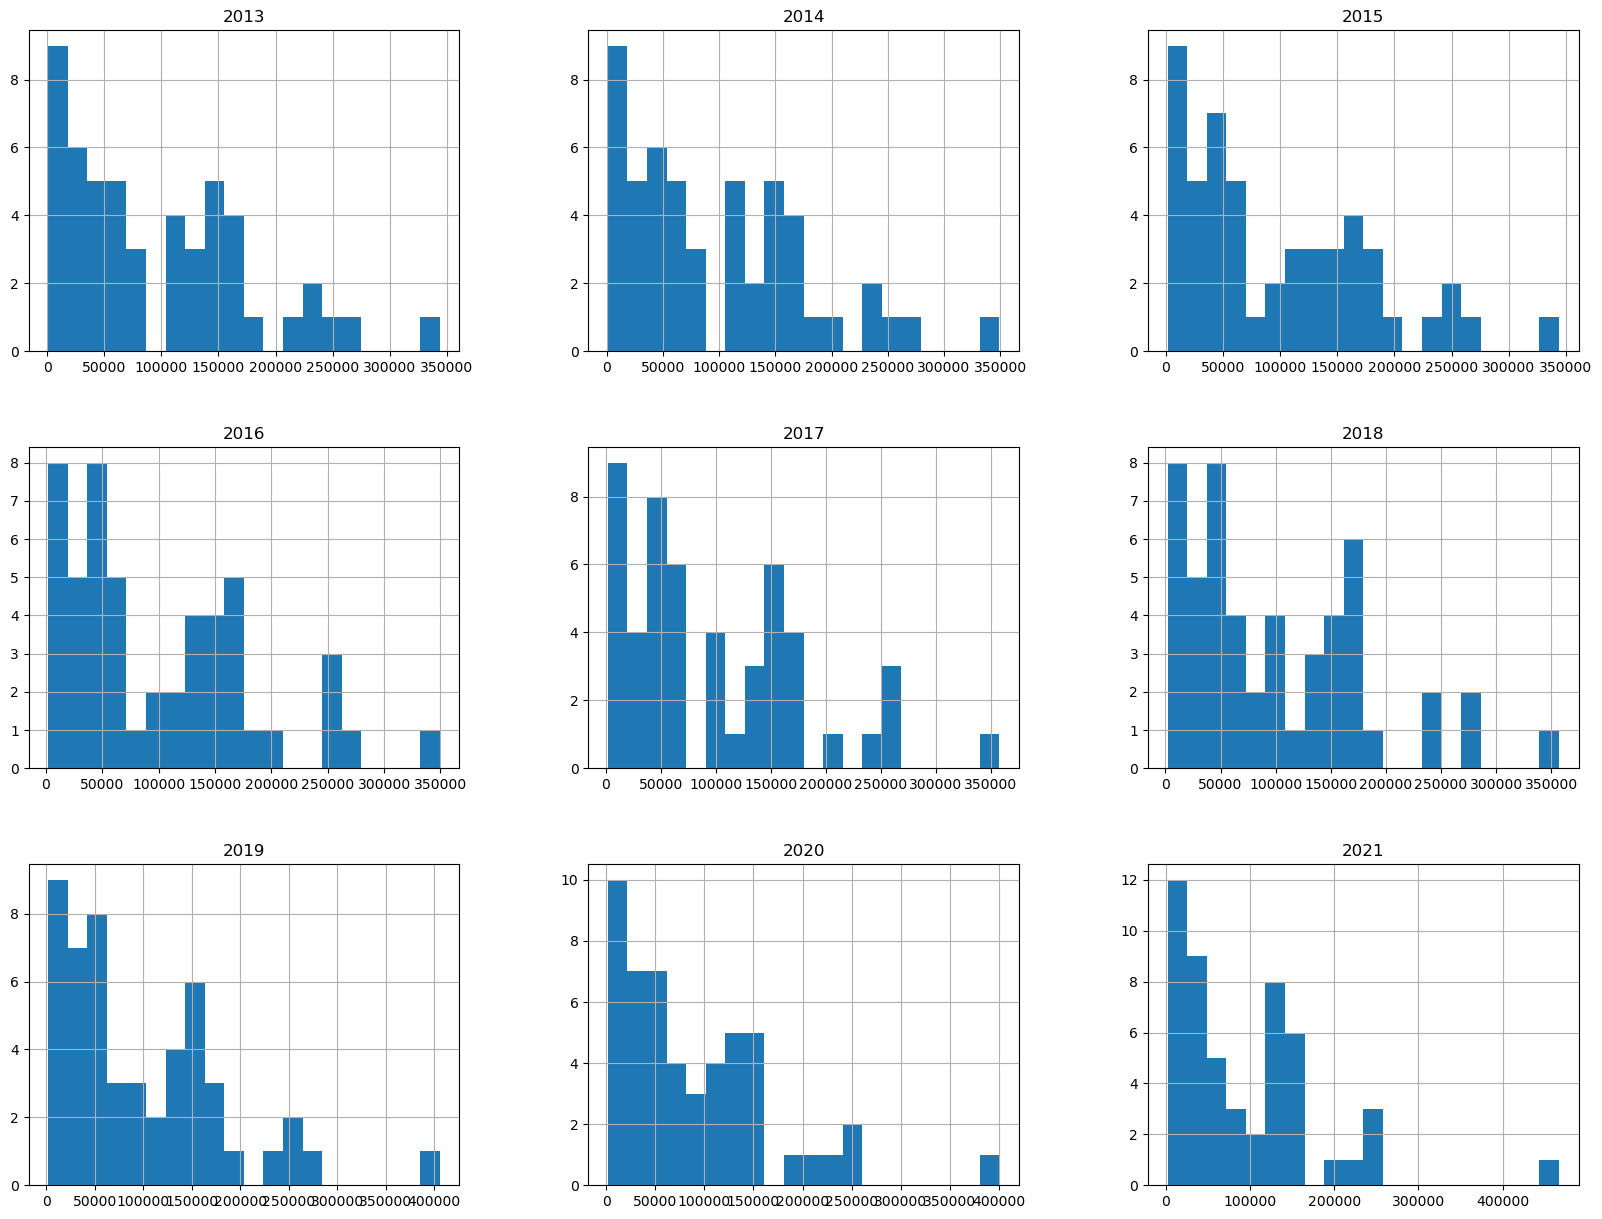

In [31]:
# Understand of distribution of data
df_Biomass.hist(bins=20, figsize=(20,15))
plt.show()

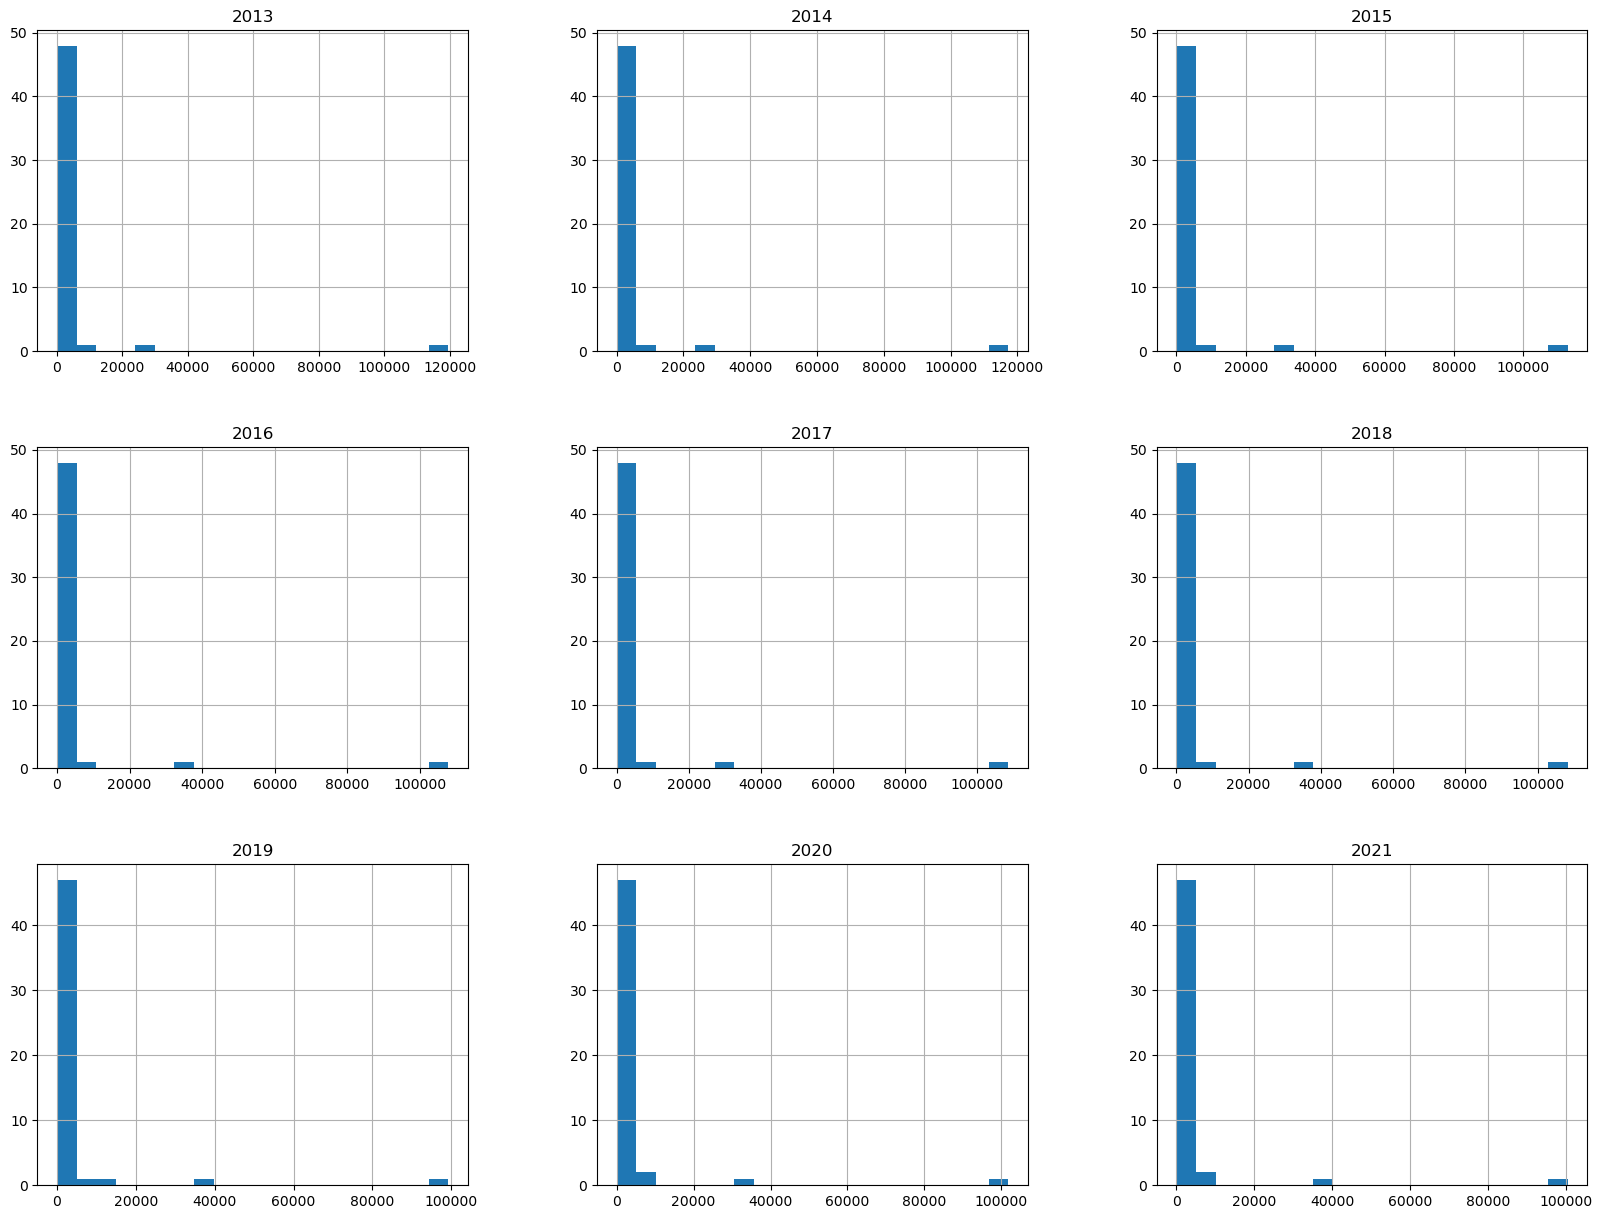

In [32]:
# Understand of distribution of data for Geothermal
df_Geothermal.hist(bins=20, figsize=(20,15))
plt.show()

In [33]:
#Check the trend of Adoption of Renwable energy in different States
def Statewise_Trend_RE(df,Label):
    # Transpose the data frame to have years as rows and states as columns
    df_transposed = df.set_index('State').transpose()
    fig, ax = plt.subplots(figsize=(25, 20))
    # Plotting data for each state
    for state in df_transposed.columns:
        line, = ax.plot(df_transposed.index, df_transposed[state], label=state)

        # Add a text label to the end of each line
        ax.text(df_transposed.index[-1], df_transposed[state].values[-1], state,
                 color=line.get_color(), size=14, va="center")

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(Label + ' :Yearly Progression for each State')

    plt.show()

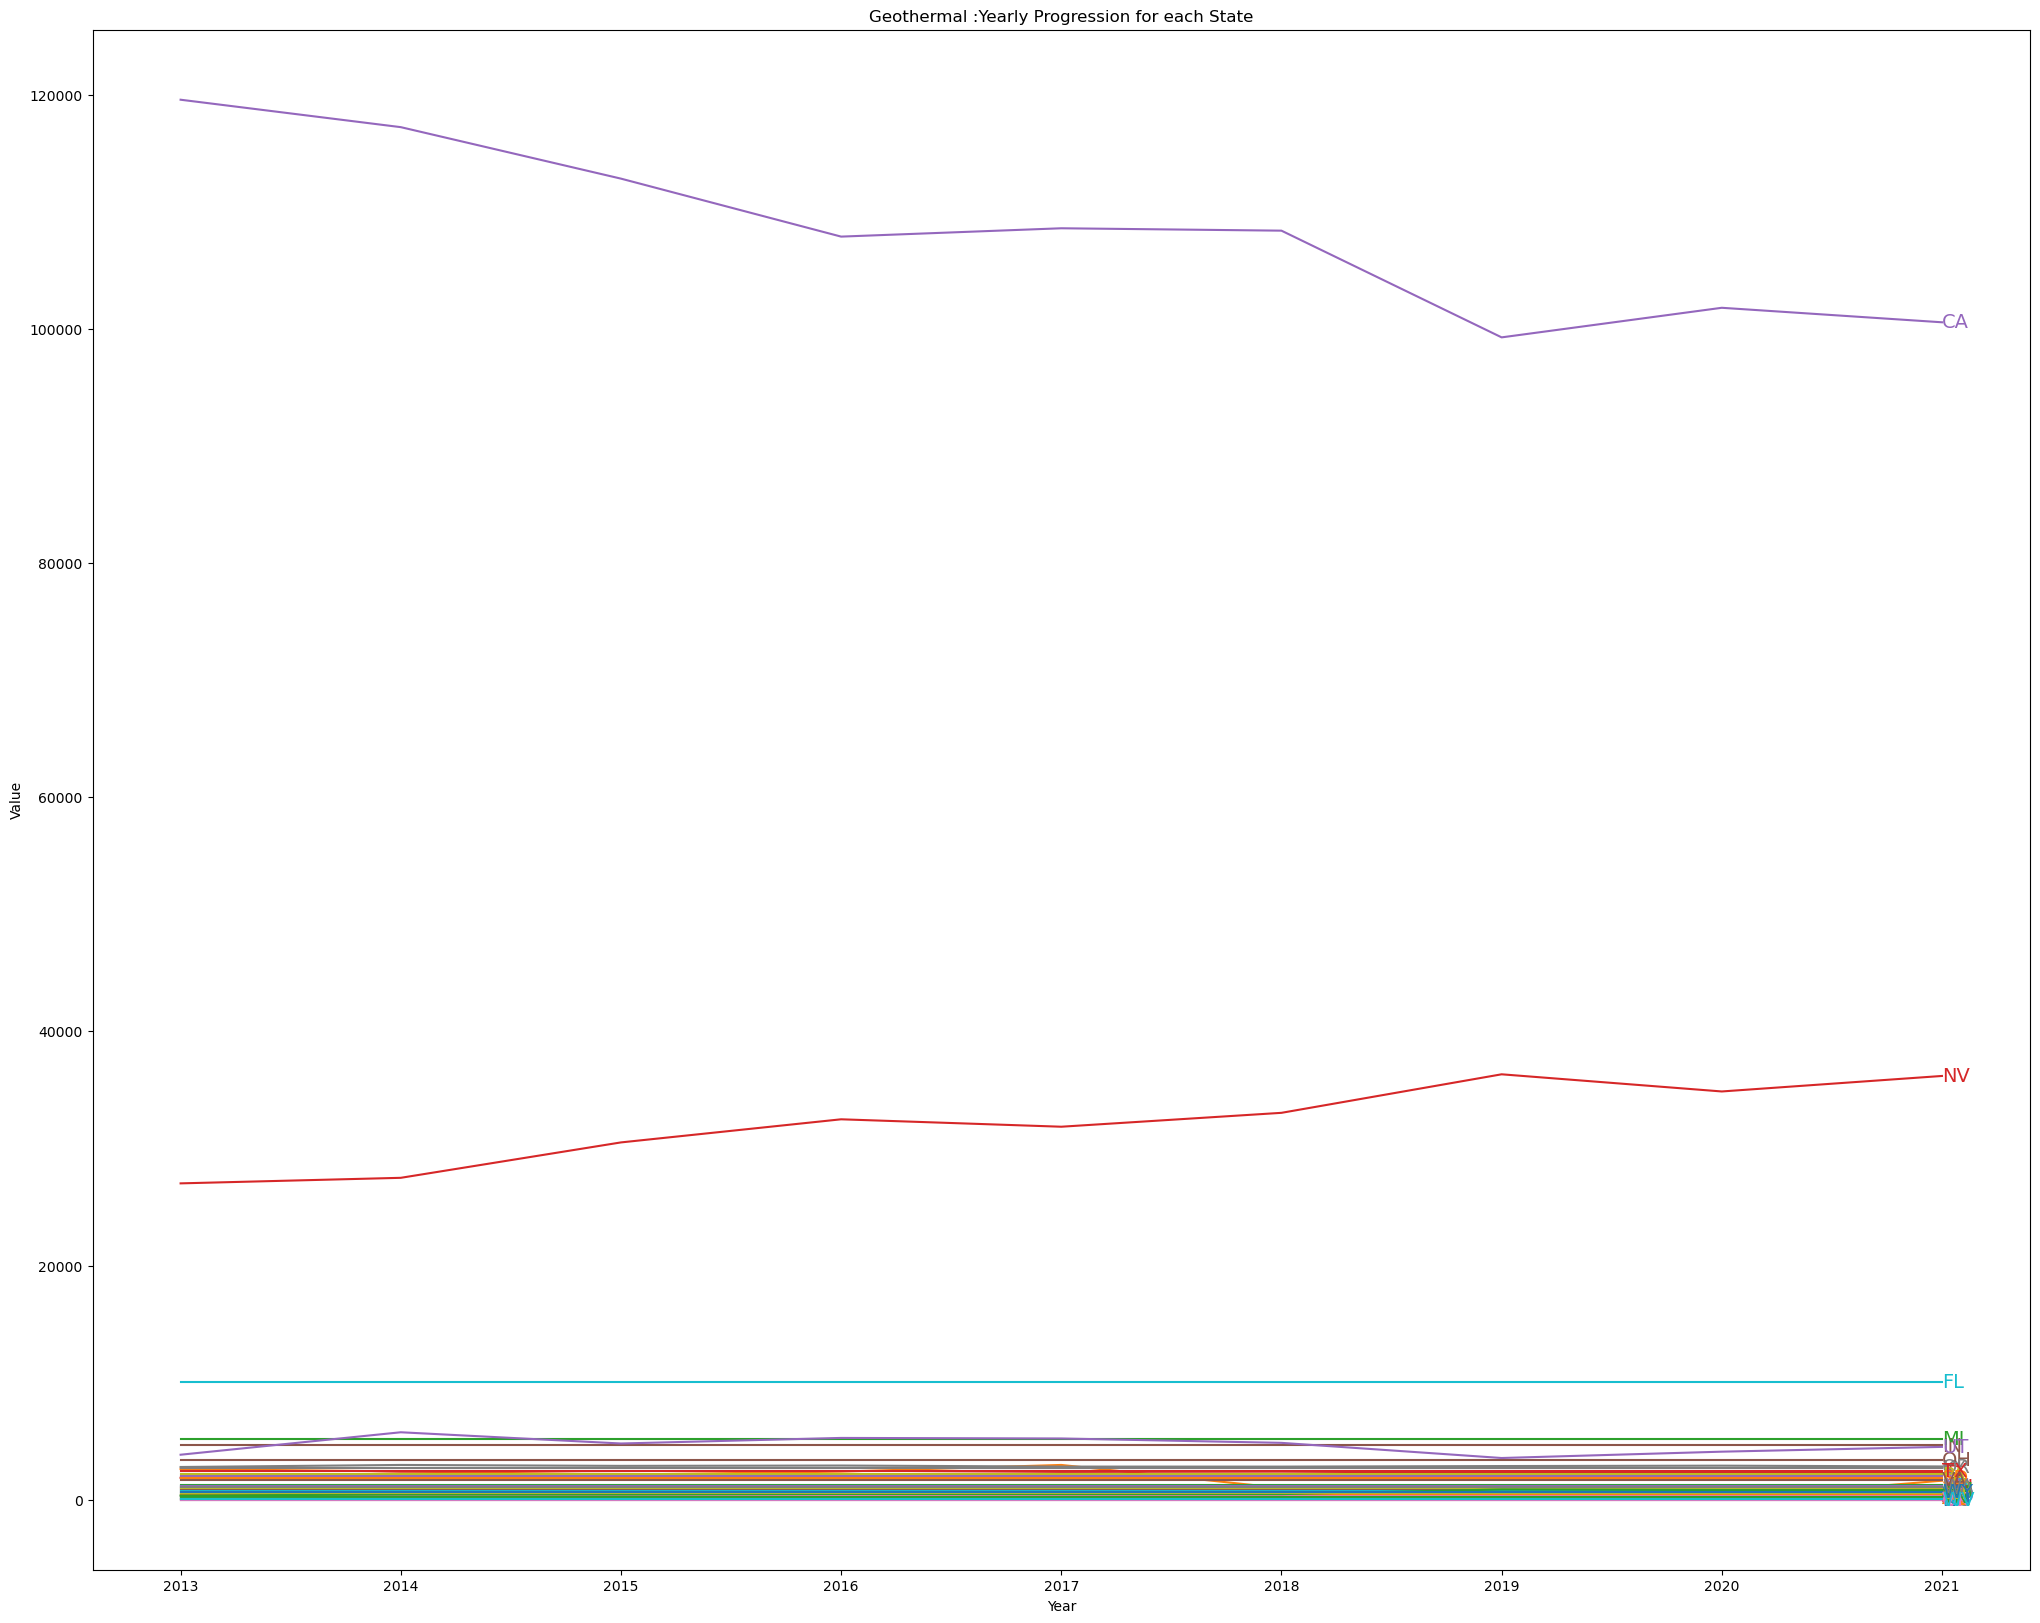

In [34]:
Statewise_Trend_RE(df_Geothermal,'Geothermal')

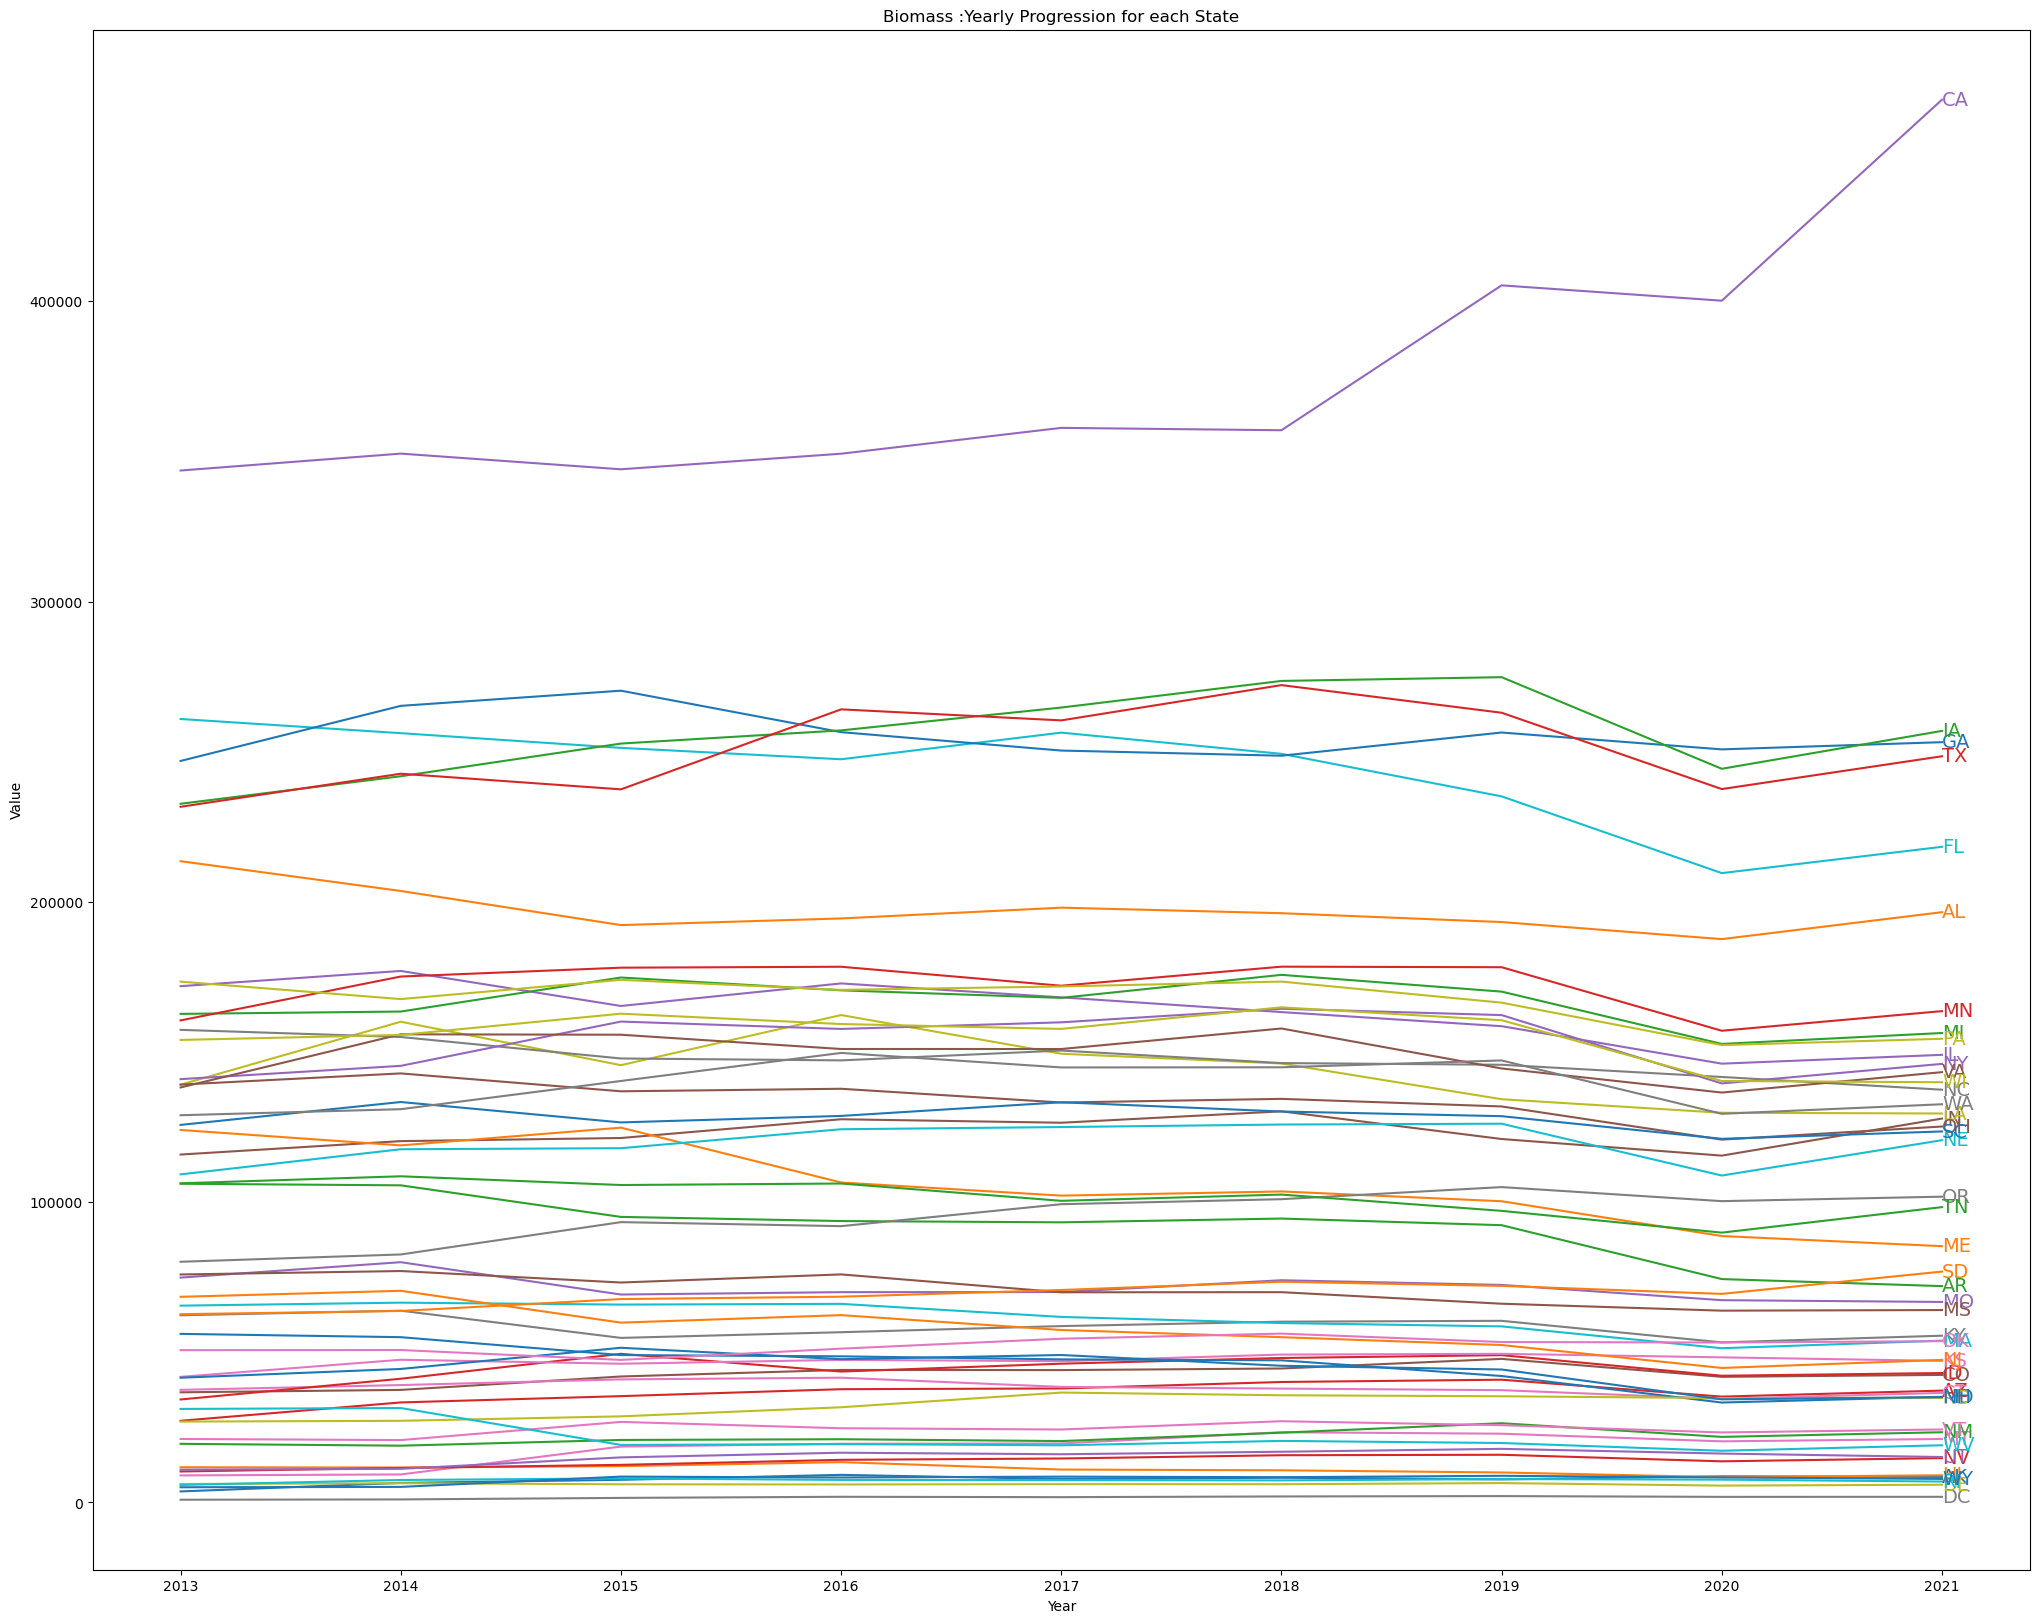

In [35]:
Statewise_Trend_RE(df_Biomass,'Biomass')

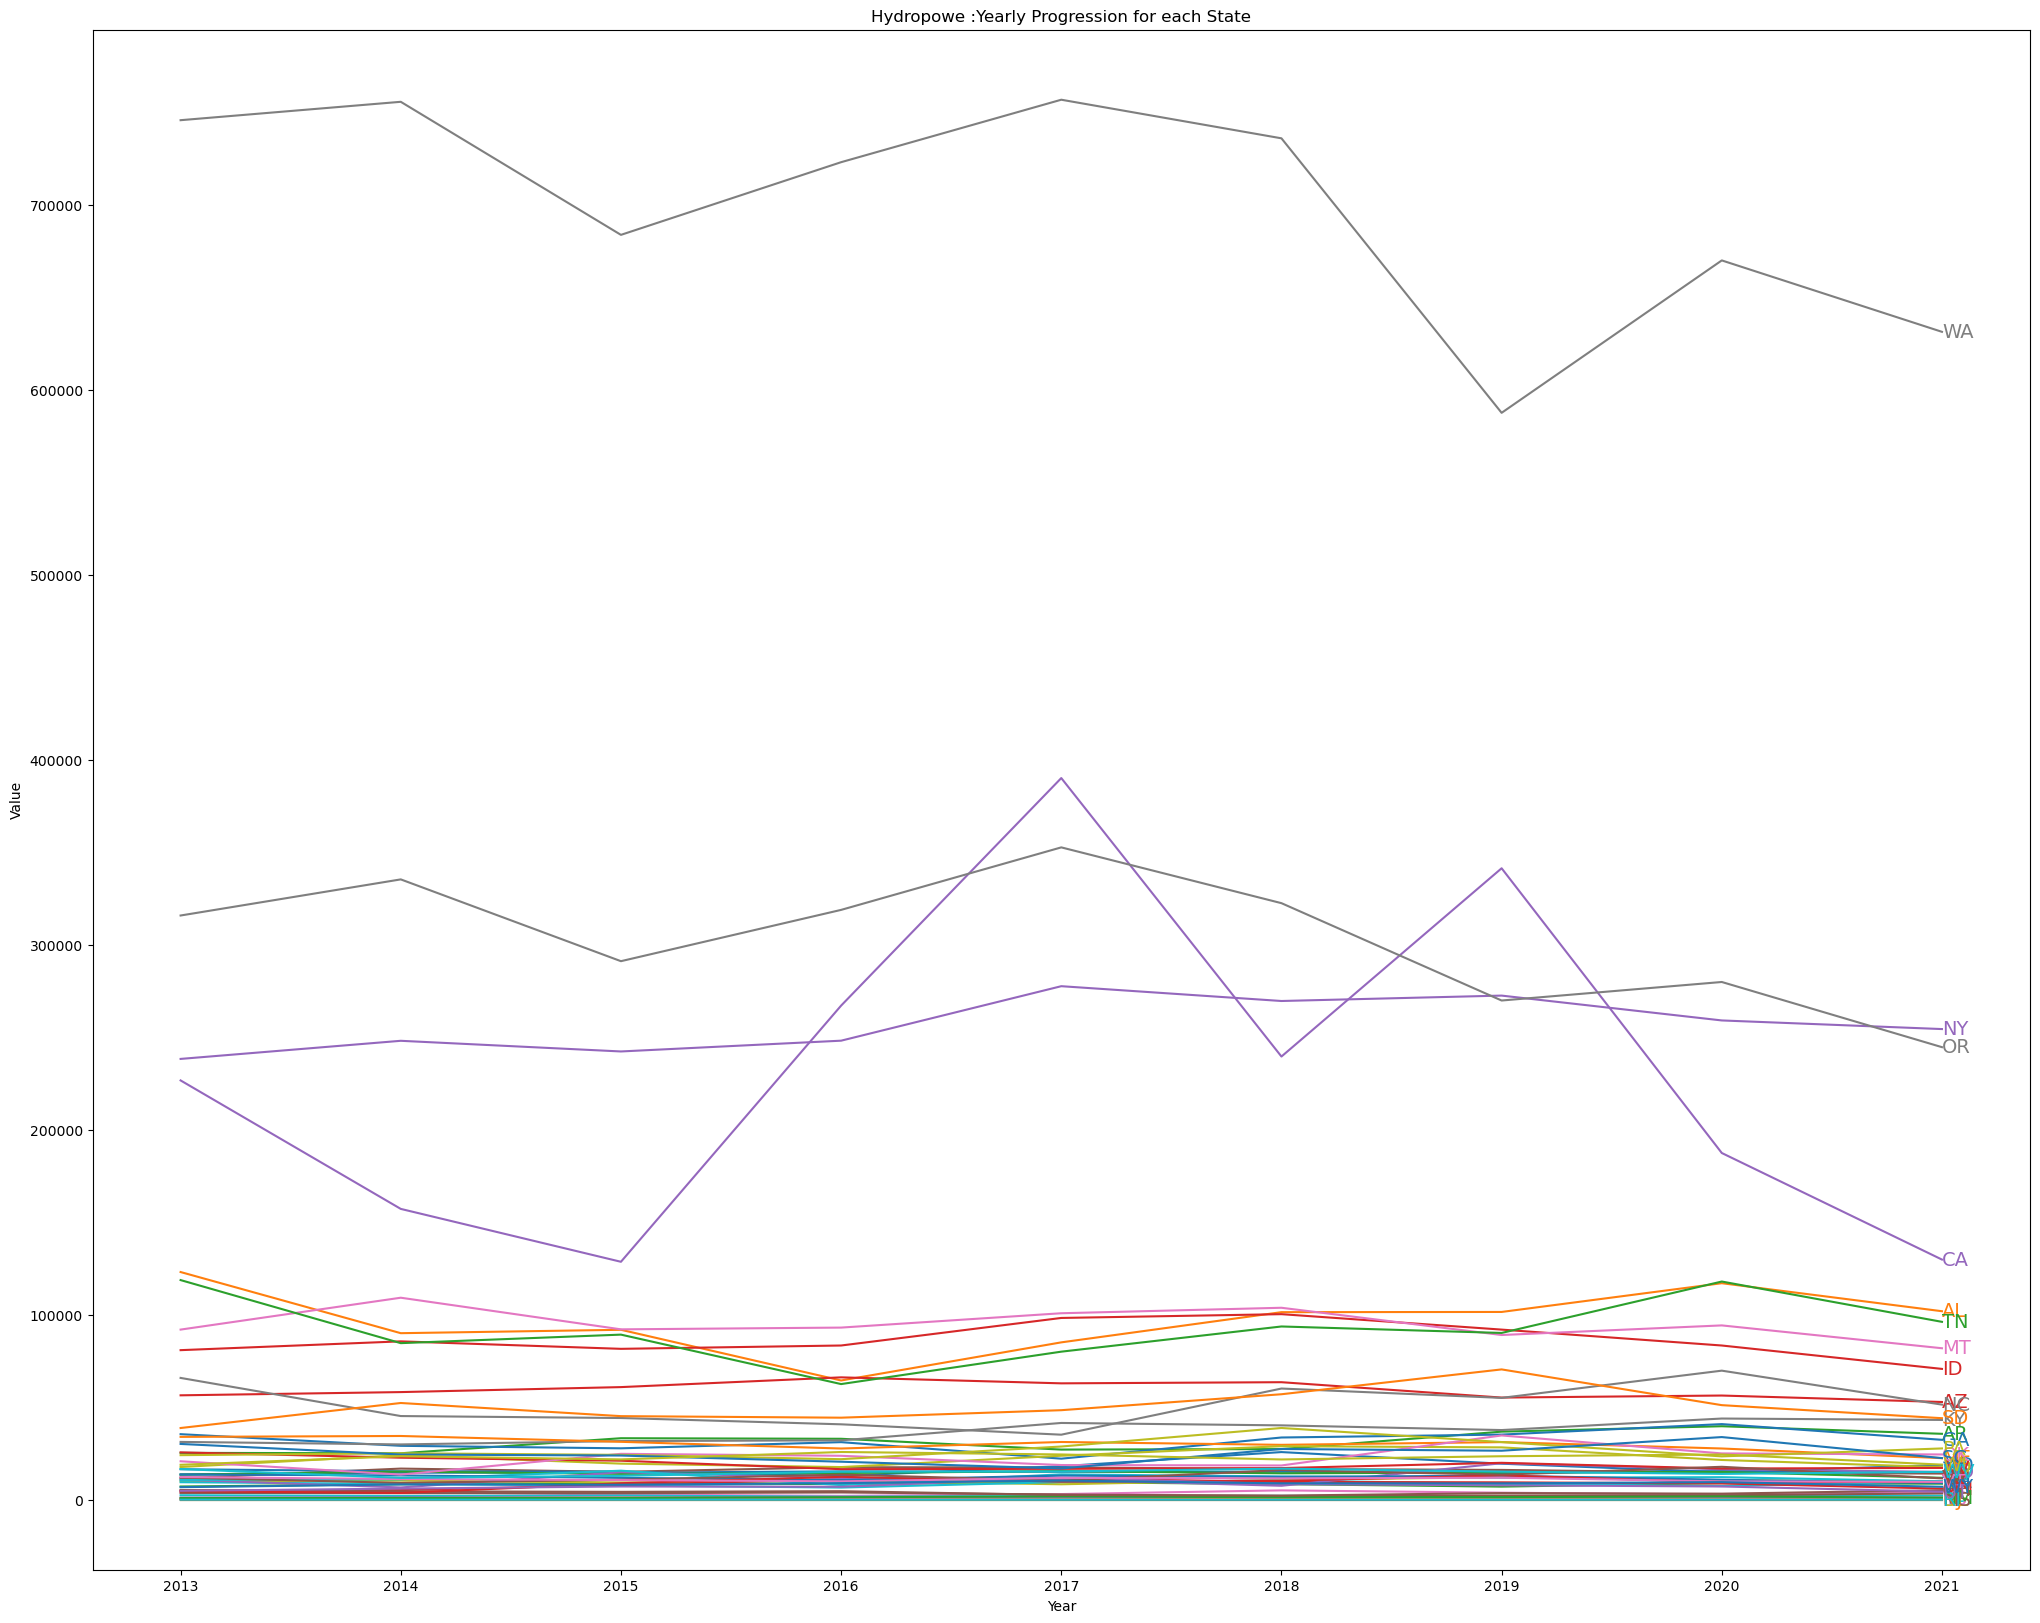

In [36]:
Statewise_Trend_RE(df_Hydropower,'Hydropowe')

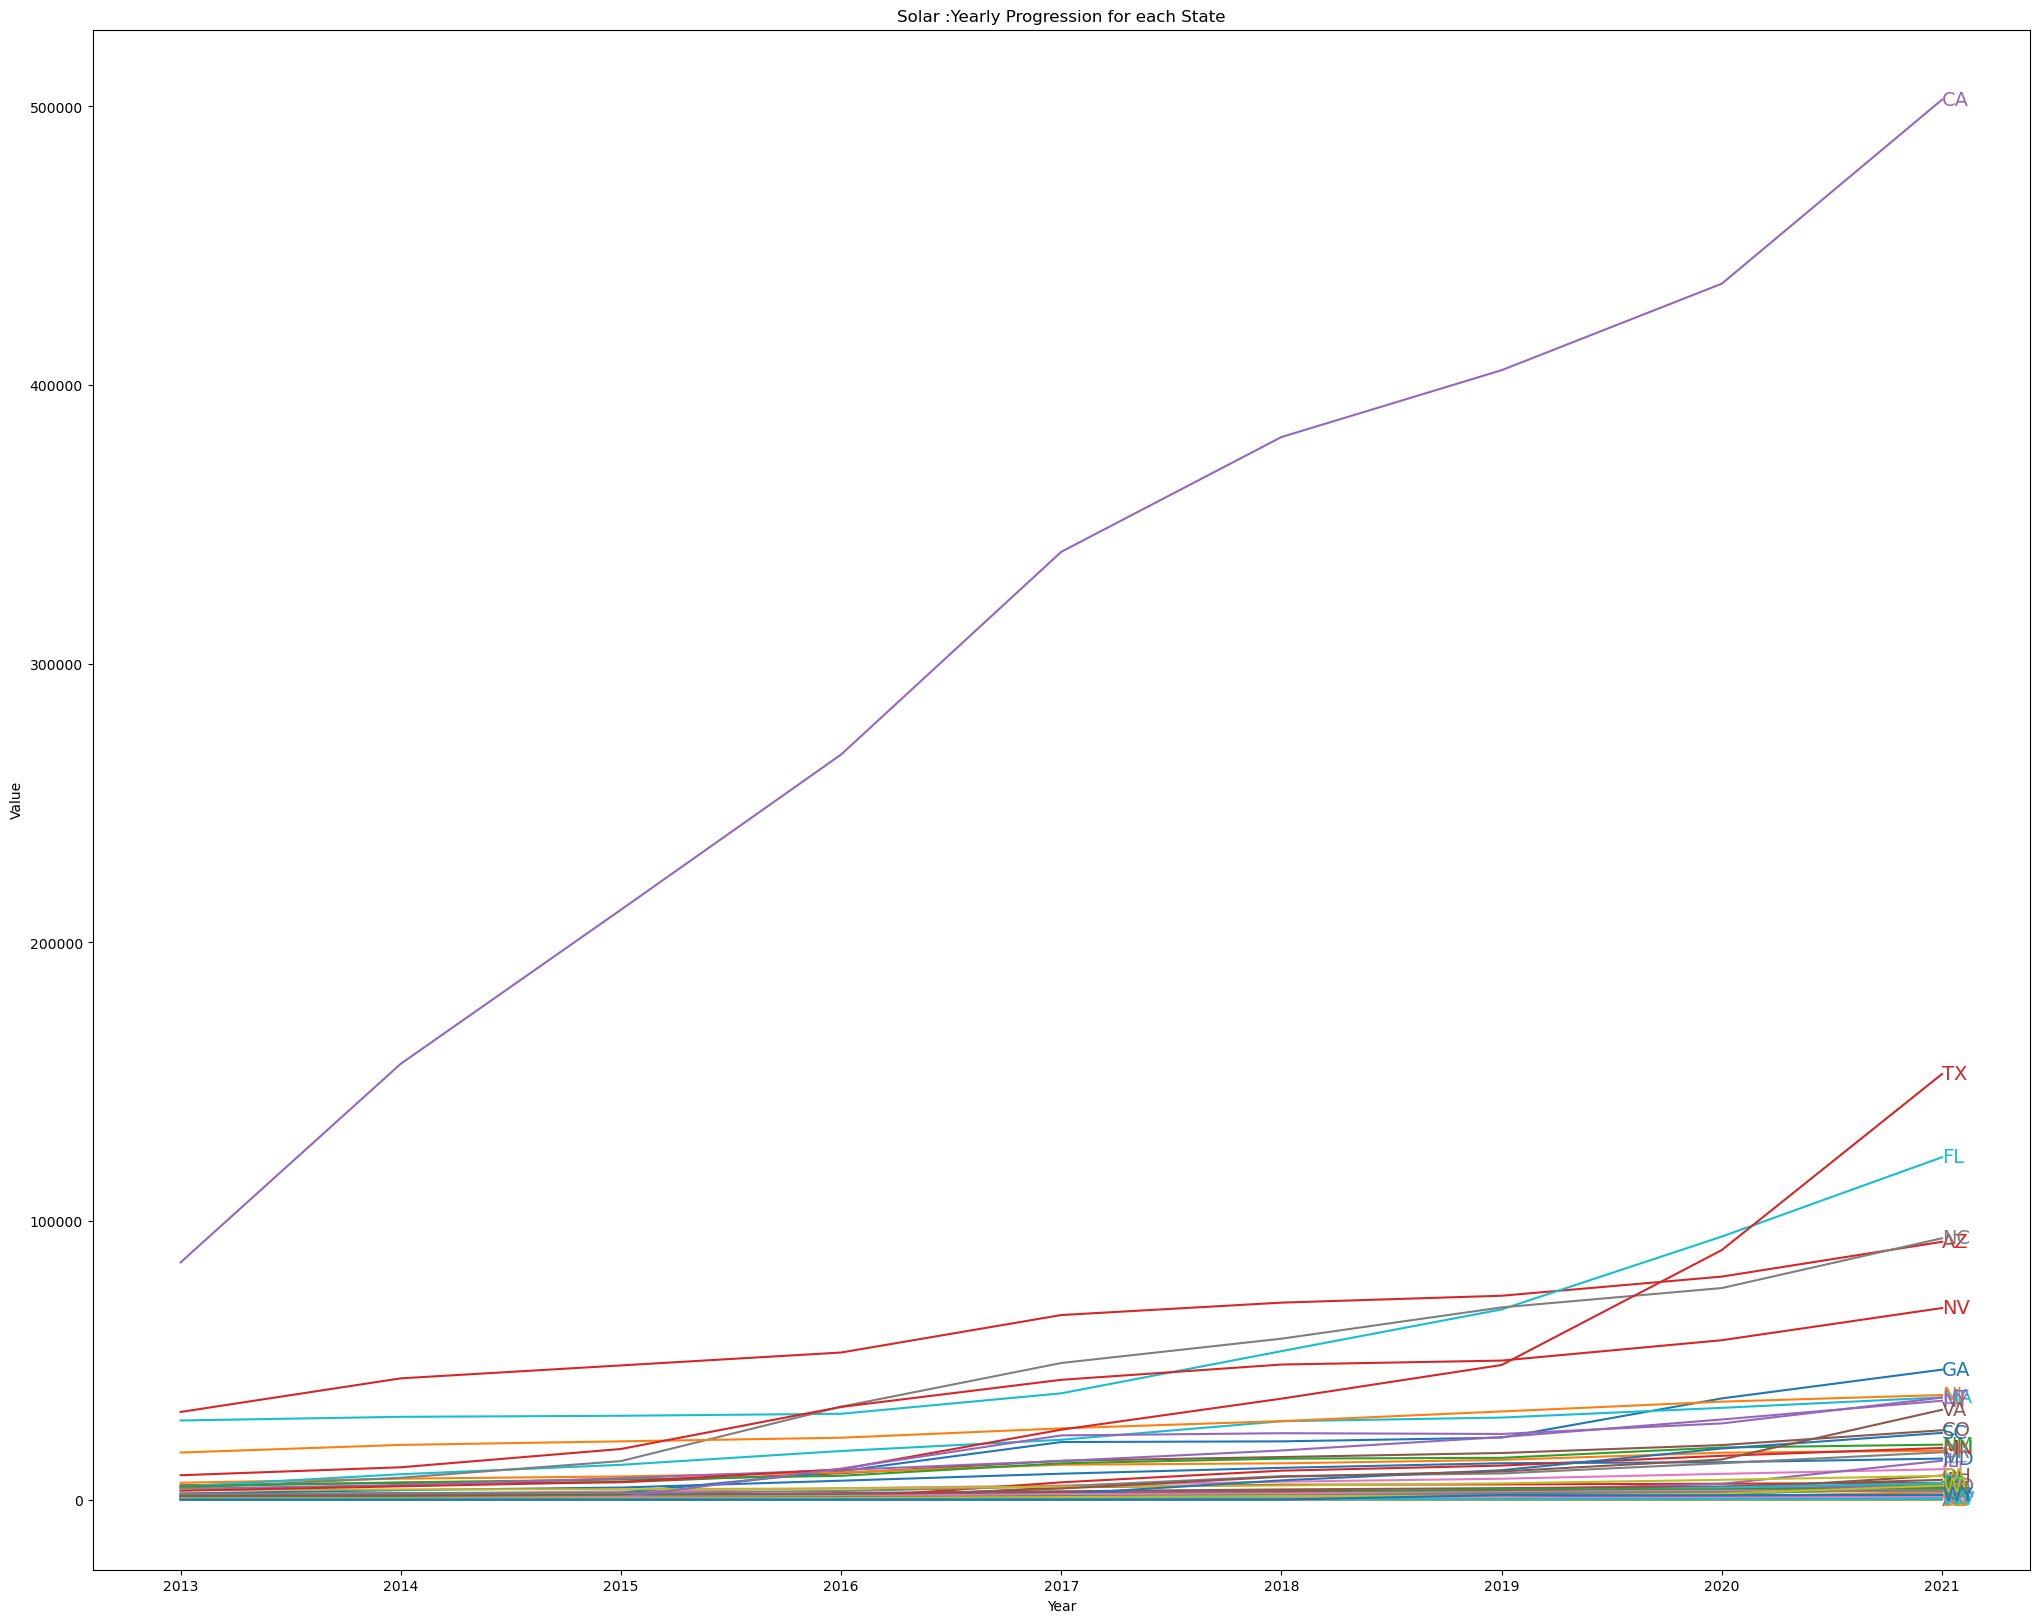

In [37]:
Statewise_Trend_RE(df_Solar,'Solar')

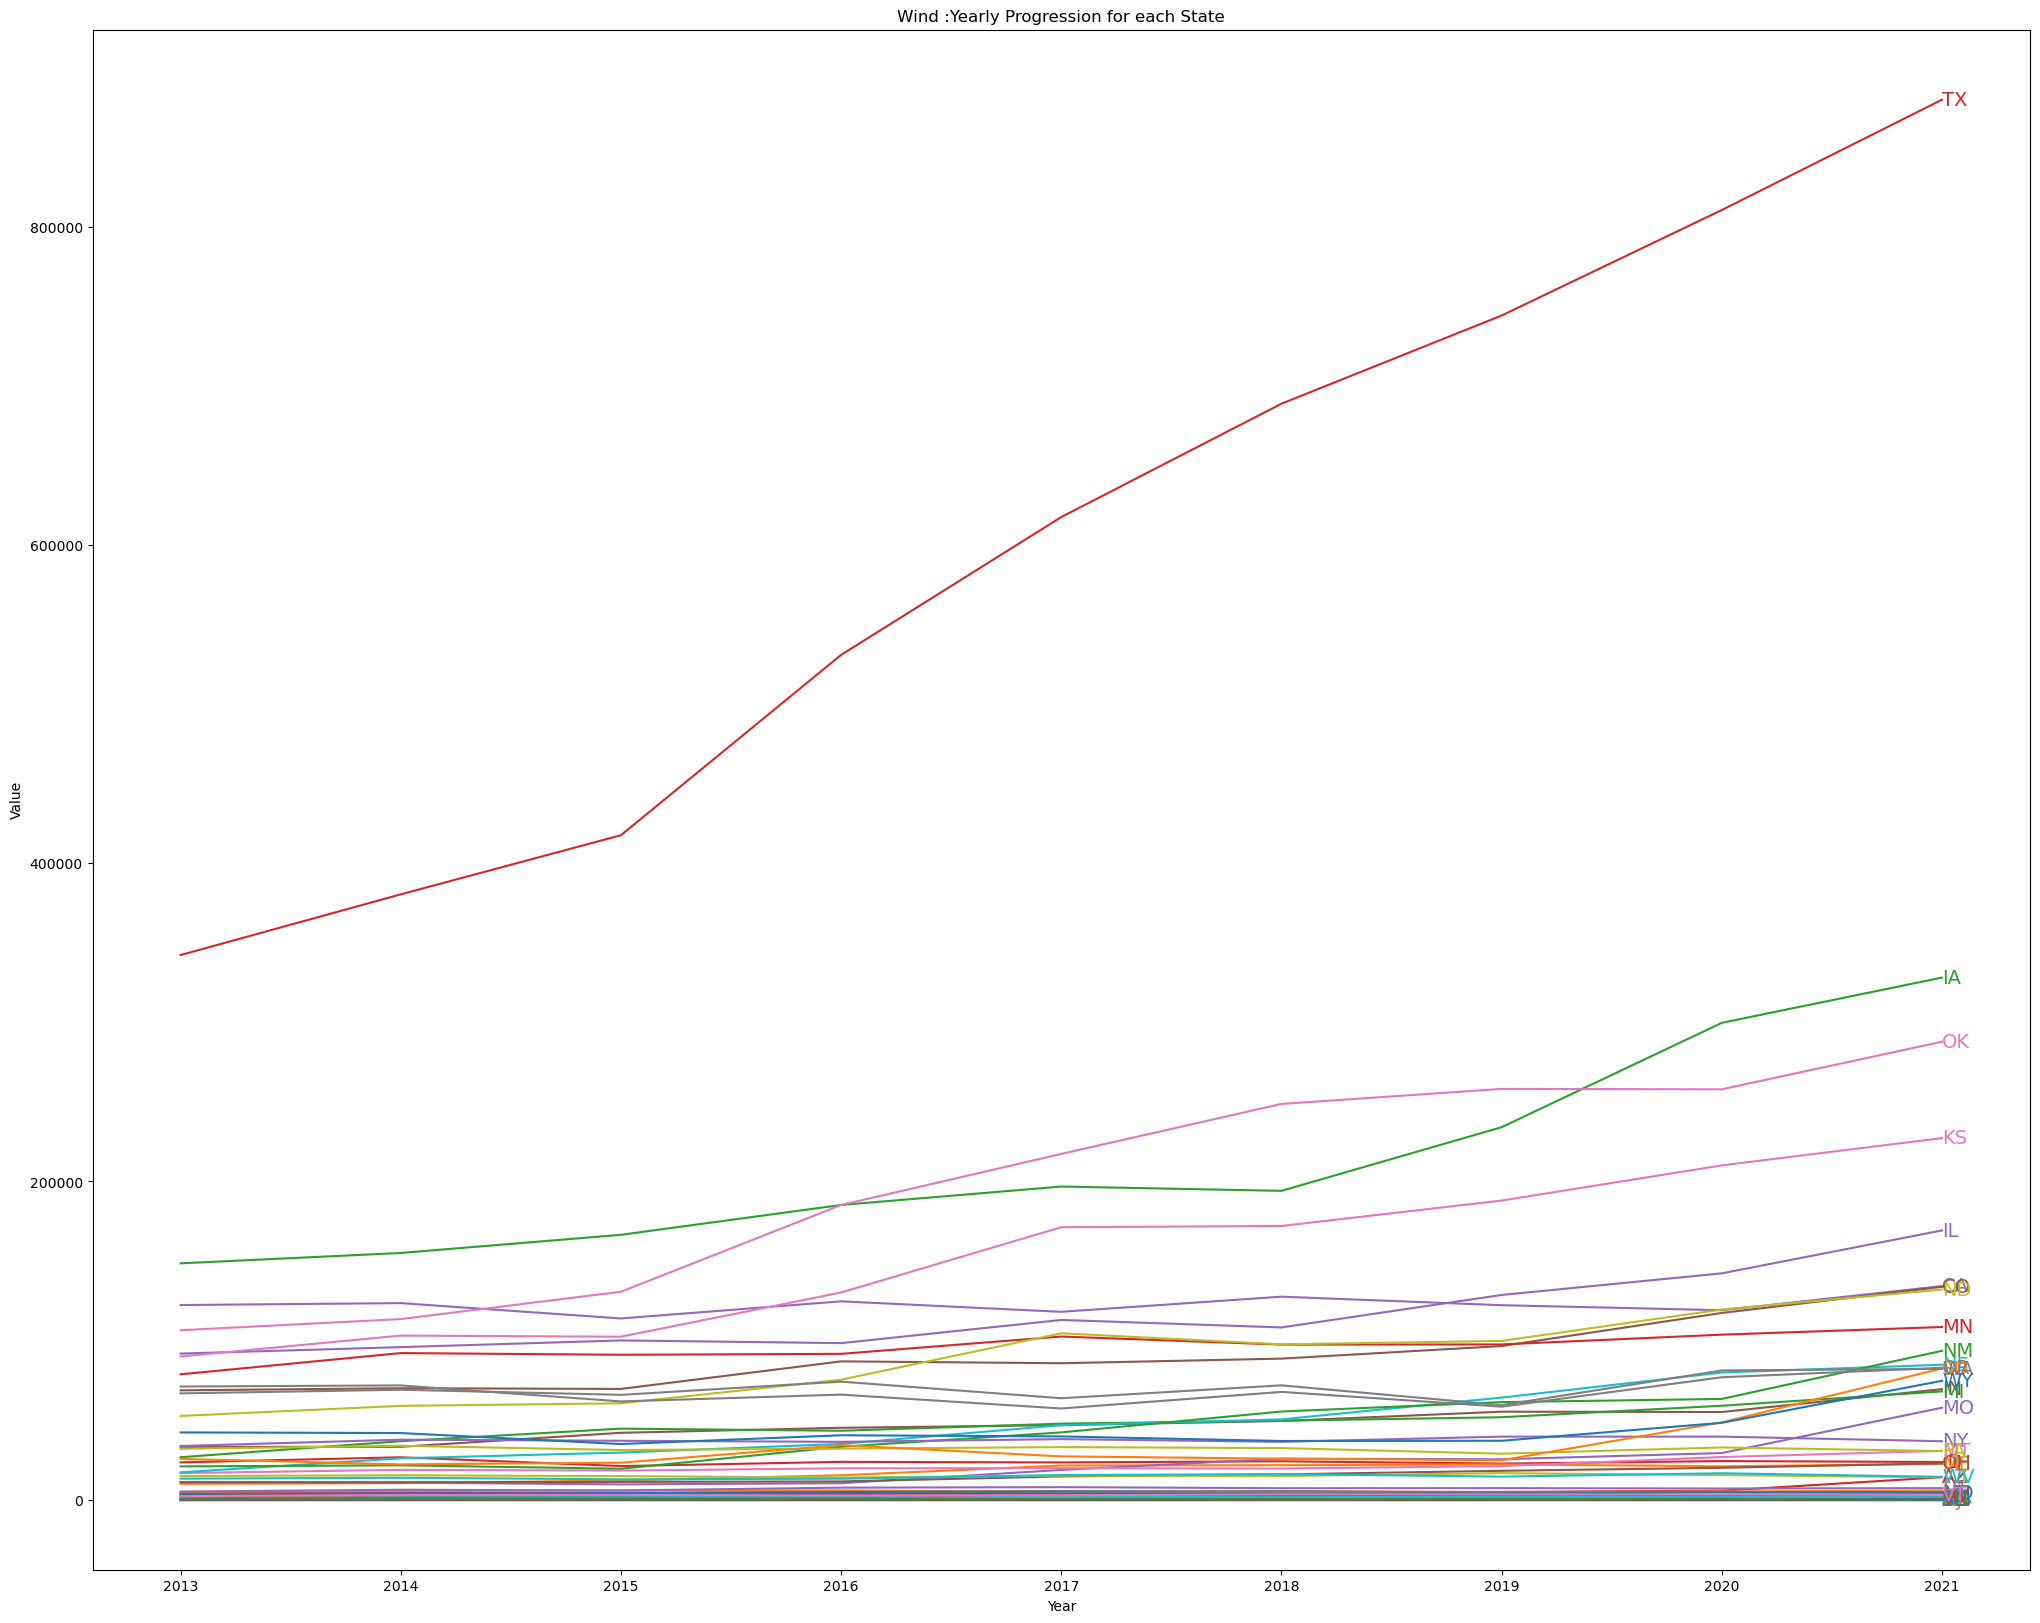

In [38]:
Statewise_Trend_RE(df_Wind,'Wind')

In [39]:
import matplotlib.pyplot as plt

def Statewise_Trend_RE_New(df, Label, loc_pos, top_n=15):
    # First, find the top N states based on the latest year's value
    latest_year = df.columns[-1]
    top_states = df.sort_values(by=latest_year, ascending=False)['State'].head(top_n).tolist()
    
    # Filter dataframe to only include the top states
    df_top_states = df[df['State'].isin(top_states)]
    
    # Transpose the data frame to have years as rows and states as columns
    df_transposed = df_top_states.set_index('State').transpose()

    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Plotting data for each state
    for state in df_transposed.columns:
        line, = ax.plot(df_transposed.index, df_transposed[state], label=state)

        # Add a text label to the end of each line
        ax.text(df_transposed.index[-1], df_transposed[state].values[-1], state,
                 color=line.get_color(), size=14, va="center")
     # Get handles and labels from the axis
    handles, labels = ax.get_legend_handles_labels()
    
    # Order them by the values of the latest year (which is the order in 'top_states')
    ordered_labels = sorted(labels, key=lambda x: top_states.index(x))
    ordered_handles = [handle for label, handle in sorted(zip(labels, handles), key=lambda x: top_states.index(x[0]))]
    
    # Apply ordered handles and labels to the legend
    ax.legend(ordered_handles, ordered_labels, loc =loc_pos)

    plt.xlabel('Year')
    plt.ylabel('RE Adoption(Billion Btu)')
    plt.title(Label + ' :Yearly Progression for Top ' + str(top_n) + ' States')
    # Display the table for the top states
    return df_top_states.set_index('State').transpose()

    # Call the function
    table_data = Statewise_Trend_RE_New(df,labels, 'upper left')
    display(table_data)
   

State      CA      CO      IA      IL      KS      MN      ND     NE     NM  \
2013   122335   68731  148538   91834   90002   78797   52656  17191  20927   
2014   123546   70068  155061   95878  103124   92152   58979  26026  21631   
2015   113906   69625  166466  100100  102440   91080   60594  29623  19466   
2016   124661   86939  185224   98402  130215   91666   75410  35052  33271   
2017   118074   85769  196800  112962  171251  102552  104596  46814  42307   
2018   127590   88661  194097  108257  172020   97473   97648  50486  55421   
2019   122228   96575  234088  128676  187978   97576   99785  64172  61333   
2020   119083  117357  299676  142253  210090  103724  119528  79914  63334   
2021   134225  133772  328097  169213  227235  108528  132087  84832  93576   

State      OK     OR     SD      TX     WA     WY  
2013   106501  71135  25643  342270  66829  42298  
2014   113507  71844  22216  380409  69109  41894  
2015   130684  61766  23262  417578  65900  34990  
2016   185198  66046  34275  530894  74210  40505  
2017   217298  57334  27240  617498  63767  39785  
2018   248723  67757  25793  688723  71875  36912  
2019   258143  58457  24822  744138  59421  37045  
2020   257899  76950  48606  810430  81231  48329  
2021   287787  82919  82485  879750  82229  74713

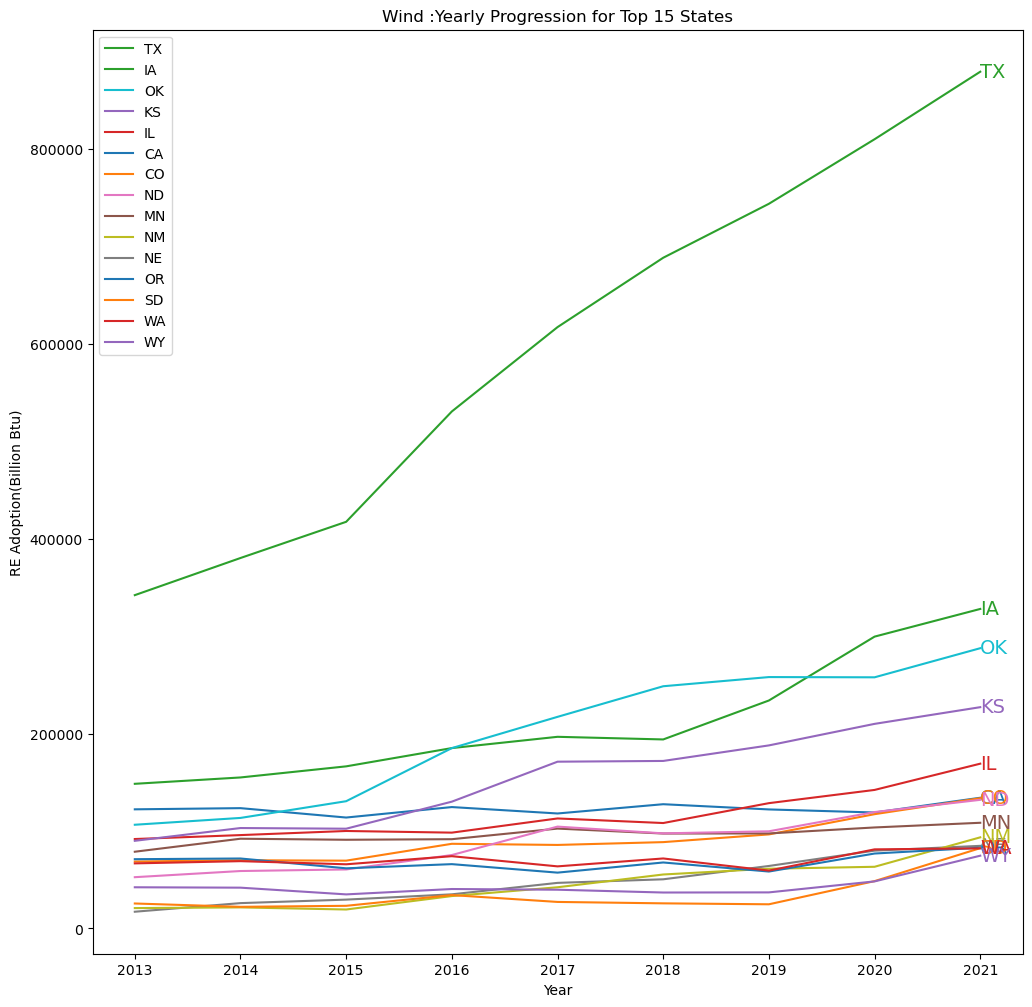

In [40]:
Statewise_Trend_RE_New(df_Wind,'Wind', 'upper left')

State      CA     FL    ID    IL    IN    KY    LA    MI     NV    OH    OR  \
2013   119556  10056  1881  2042  4647  2712  1842  5193  27022  3435  2803   
2014   117214  10056  2251  2042  4647  2712  1842  5193  27496  3435  2977   
2015   112818  10056  2206  2042  4647  2712  1842  5193  30519  3435  2898   
2016   107867  10056  2167  2042  4647  2712  1842  5193  32493  3435  2927   
2017   108579  10056  2280  2042  4647  2712  1842  5193  31859  3435  2838   
2018   108375  10056  2258  2042  4647  2712  1842  5193  33045  3435  2836   
2019    99263  10056  2353  2042  4647  2712  1842  5193  36335  3435  2883   
2020   101789  10056  2296  2042  4647  2712  1842  5193  34870  3435  2916   
2021   100551  10056  2324  2042  4647  2712  1842  5193  36194  3435  2849   

State    PA    SD    TX    UT  
2013   2162  1868  2478  3851  
2014   2162  1868  2478  5768  
2015   2162  1868  2478  4809  
2016   2162  1868  2478  5285  
2017   2162  1868  2478  5237  
2018   2162  1868  2478  4864  
2019   2162  1868  2478  3570  
2020   2162  1868  2478  4111  
2021   2162  1868  2478  4520

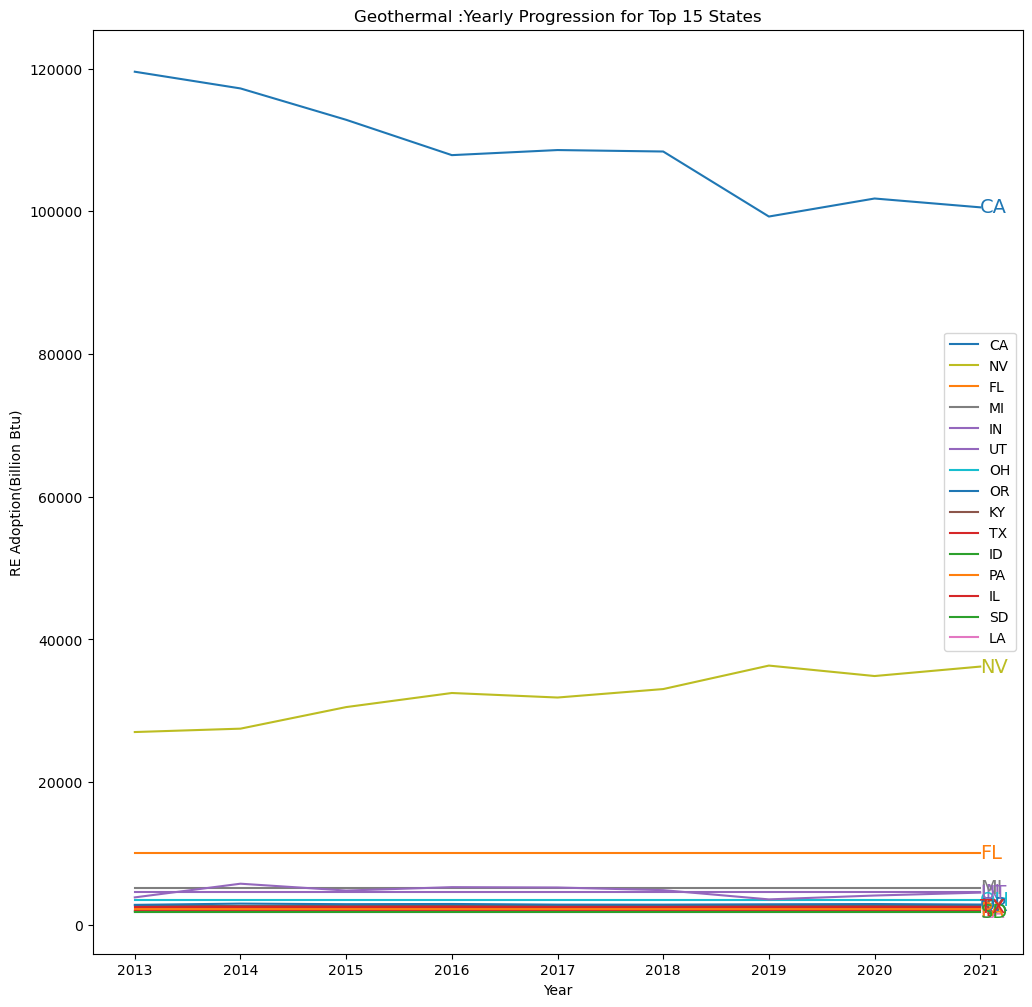

In [41]:
Statewise_Trend_RE_New(df_Geothermal,'Geothermal','center right')

State      AL      CA      FL      GA      IA      IL      MI      MN      NC  \
2013   213553  343657  260909  246936  232673  171930  162703  160530  157380   
2014   203628  349289  256189  265285  241842  177003  163477  175139  155000   
2015   192270  344065  251293  270333  252726  165332  174814  178087  147848   
2016   194485  349253  247497  256525  257115  172843  170546  178398  147215   
2017   198072  357861  256365  250395  264720  168207  168031  172076  150492   
2018   196226  357070  249306  248680  273583  163299  175701  178423  146317   
2019   193284  405324  235146  256401  274833  158599  170114  178245  145756   
2020   187599  400214  209583  250788  244325  146123  152696  157085  141691   
2021   196574  467144  218337  253190  256941  149059  156330  163620  137451   

State      NY      PA      TX      VA      WA      WI  
2013   140965  173435  231668  138197  128945  154023  
2014   145391  167629  242682  155898  130961  155692  
2015   160141  174037  237474  155759  140355  162766  
2016   157681  170698  264117  151006  149698  159324  
2017   159888  171831  260442  150998  144865  157696  
2018   164409  173457  272193  157833  144912  164881  
2019   162300  166439  262990  144528  147193  160588  
2020   139541  152305  237571  136500  129421  140351  
2021   146045  154408  248494  143294  132601  139938

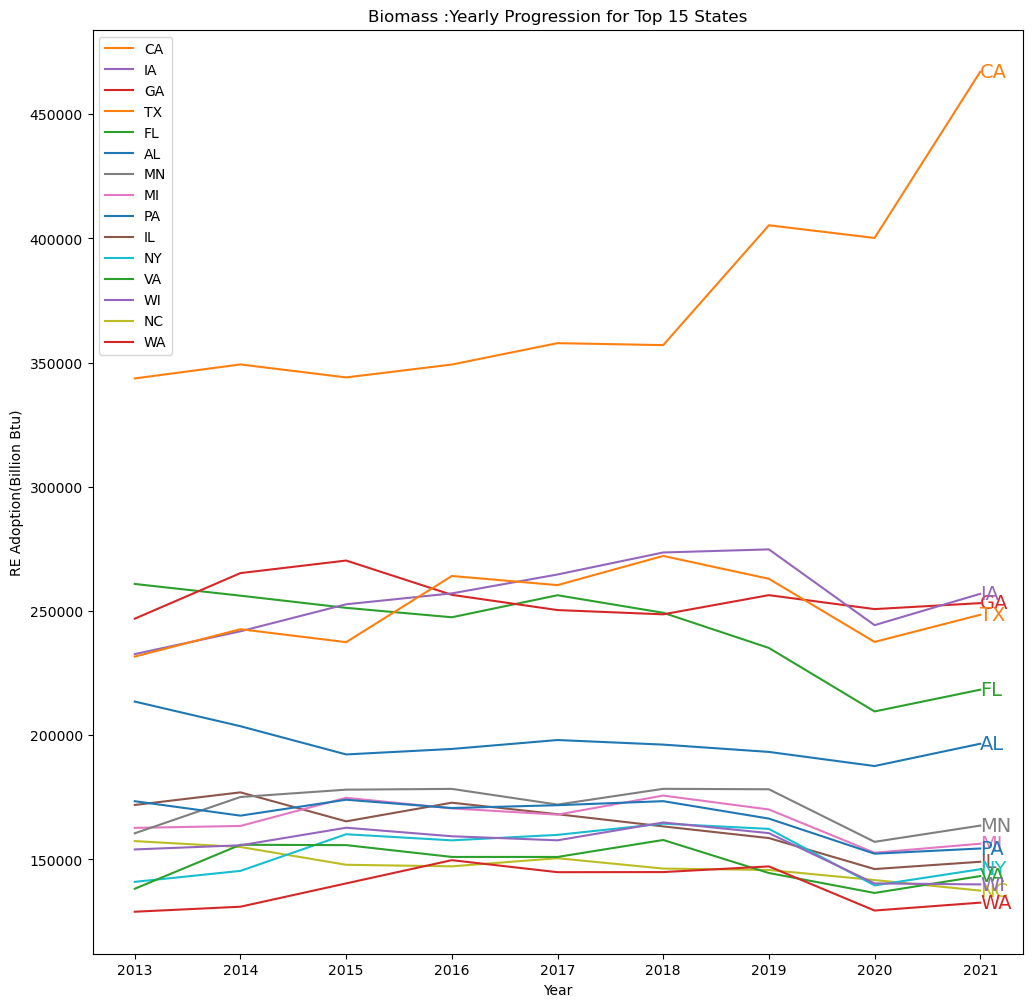

In [42]:
Statewise_Trend_RE_New(df_Biomass,'Biomass','upper left')

State      AL     AR     AZ      CA     GA      ID     KY      MT     NC  \
2013   123071  25329  56432  226643  35431   80845  31249   91959  65838   
2014    90020  25102  58179  157197  29139   85602  29892  109189  45226   
2015    91853  33243  60874  128612  27789   81559  31700   92094  44167   
2016    64456  32944  66144  267078  31123   83359  32094   93042  40762   
2017    85057  27102  62908  390080  22189   98253  41491  100795  35156   
2018   101380  27374  63524  239556  33634  100299  40193  103759  60096   
2019   101495  36795  55213  341319  35206   91955  37656   89030  55047   
2020   117032  39720  56316  187416  40877   83358  43883   94224  69763   
2021   101890  35630  52824  129809  32378   70710  43127   81881  51408   

State      NY      OR     PA     SD      TN      WA  
2013   238270  315785  24088  38761  118721  745678  
2014   248060  335306  25115  52283   84636  755615  
2015   242299  291098  24251  45177   89240  683693  
2016   248125  318822  21912  44345   62511  722975  
2017   277575  352611  28759  48393   80028  756740  
2018   269574  322458  38773  57011   93643  735877  
2019   272495  269836  31174  70437   90145  587497  
2020   259064  279848  23429  51117  117937  669883  
2021   254402  244621  27725  44066   96147  631279

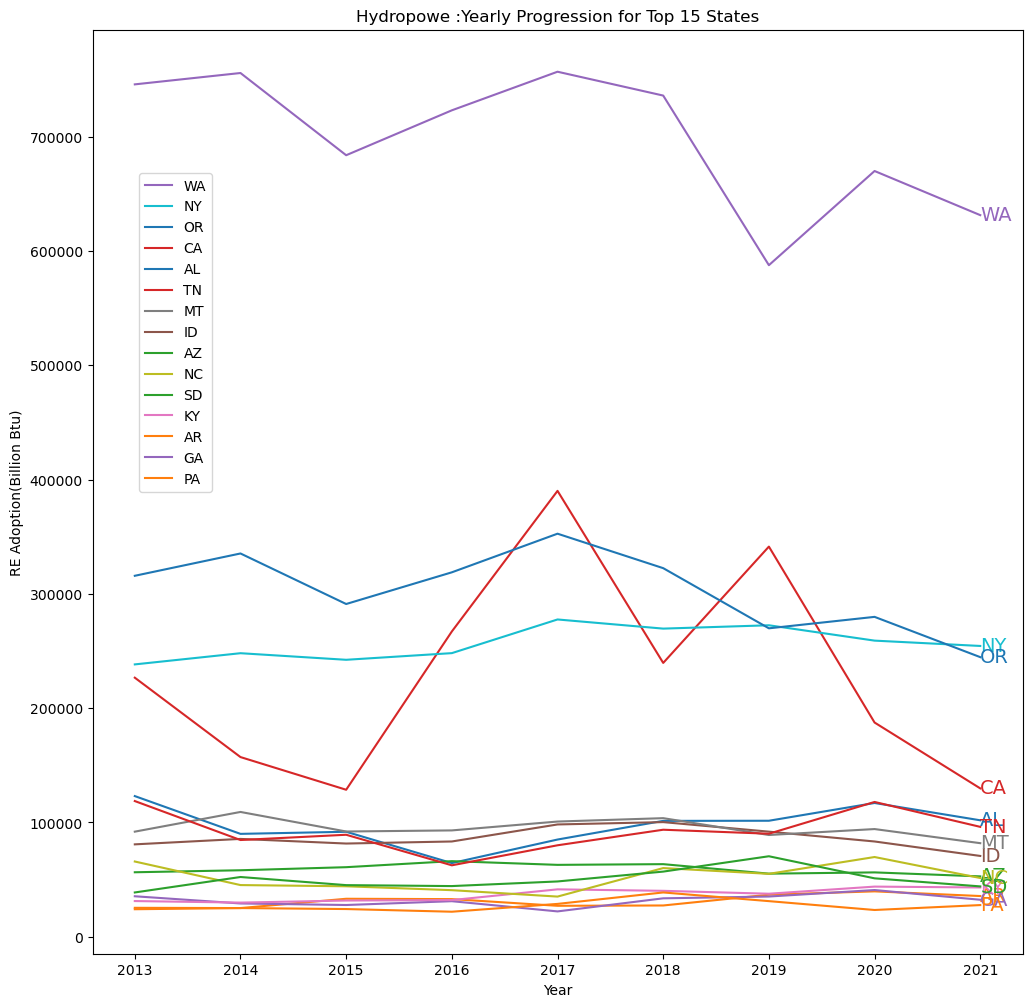

In [43]:
Statewise_Trend_RE_New(df_Hydropower,'Hydropowe',(0.05,0.5))

State     AZ      CA     CO      FL     GA     MA     NC     NJ     NM     NV  \
2013   31499   85168   5214   28437   1329   4752   4167  16933   4724   8790   
2014   43562  156446   6045   29755   2396   9149   7897  19678   6234  11649   
2015   48205  211736   6267   30133   2460  12529  13863  20956   7253  18207   
2016   52832  267428   9505   30842  10251  17487  33383  22252   8587  33310   
2017   66282  340183  13966   38184  20705  21521  49072  25617  13069  43037   
2018   70733  381368  15326   53322  20944  28159  57796  28212  14754  48516   
2019   73207  405353  16769   68295  22289  29491  69015  31680  15037  49933   
2020   80075  436394  19618   94430  36360  32972  75963  35203  18739  57245   
2021   92557  502419  24935  122906  46685  36746  93833  37578  19774  68791   

State     NY     SC      TX     UT     VA  
2013    3885     58    3231    285    658  
2014    5296    117    4815    433    729  
2015    7725    140    6394    980    803  
2016   10670    412   10942  11163   1104  
2017   13911   2036   25141  23084   4032  
2018   17674   6944   36275  23879   8235  
2019   22491  10599   48351  23607  10160  
2020   28799  18380   89596  27389  14439  
2021   35516  23980  152770  36644  32280

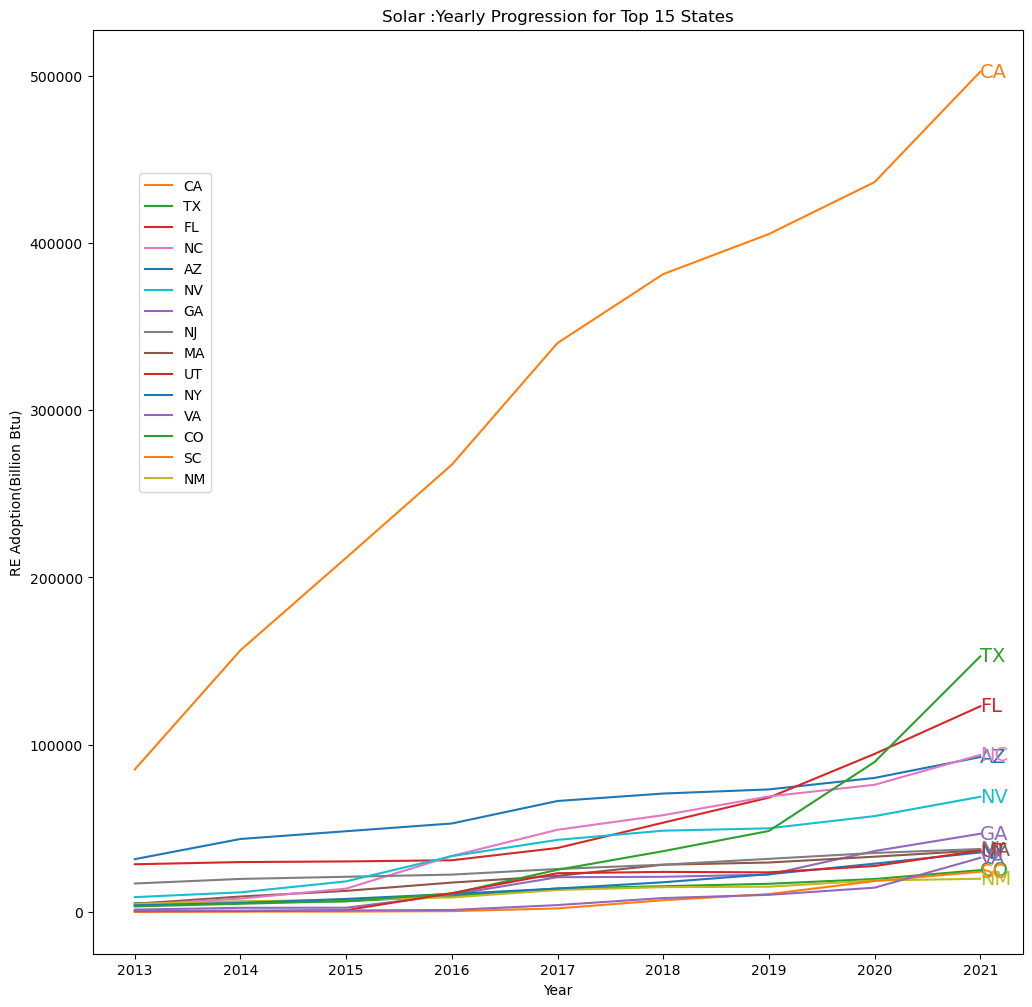

In [44]:
Statewise_Trend_RE_New(df_Solar,'Solar',(0.05,0.5))

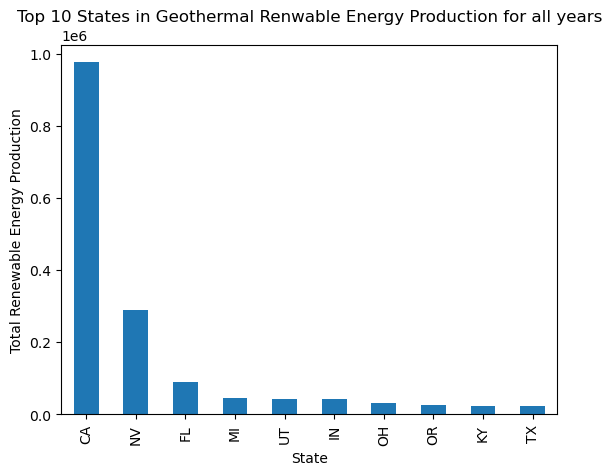

In [45]:
#Drop state column and sum across rows(across years for each state).
df_Geothermal['Total']= df_Geothermal.drop('State',axis=1).sum(axis=1)

#now short the dataframe by Total column in descending order and keep the top 10 states
df_top_10= df_Geothermal.sort_values(by='Total', ascending =False).head(10)
df_top_10.plot(x='State',y='Total', kind ='bar', legend =False)

#Adding labels and titles
plt.xlabel('State')
plt.ylabel('Total Renewable Energy Production')
plt.title('Top 10 States in Geothermal Renwable Energy Production for all years')

#Displaying the plots
plt.show()


In [46]:
# Year wise checking for Specified RE factor.

def Topmost_State_RE_Production(df,Label):

    for year in df.columns[1:]: # Skip the 'State' column
        # Sort the DataFrame by the current year column in descending order and keep the top 10 states.
        df_top_10 = df.sort_values(by=year, ascending=False).head(10)

        # Creating a bar plot using the 'State' column as the x-axis and the current year column as the y-axis.
        df_top_10.plot(x='State', y=year, kind='bar', legend=False)

        # Adding labels and title.
        plt.xlabel('State')
        plt.ylabel('Renewable Energy Production((Billion Btu)')
        plt.title(f'Top 10 States in {Label} Renewable Energy Production in {year}')

        # Displaying the plot. 
        plt.show()

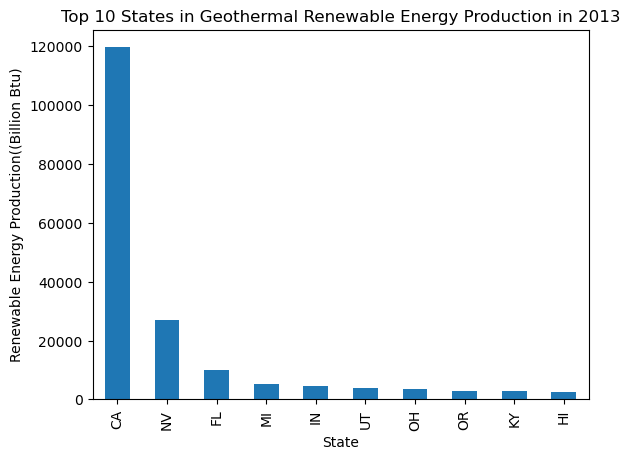

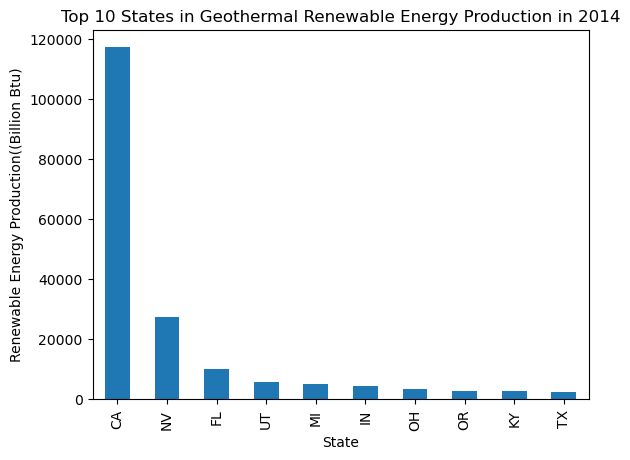

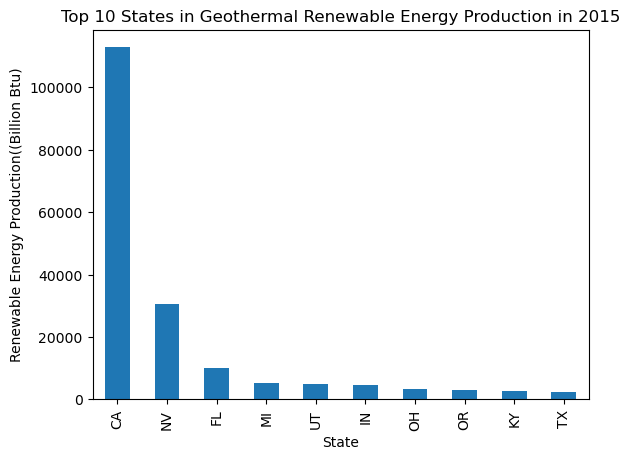

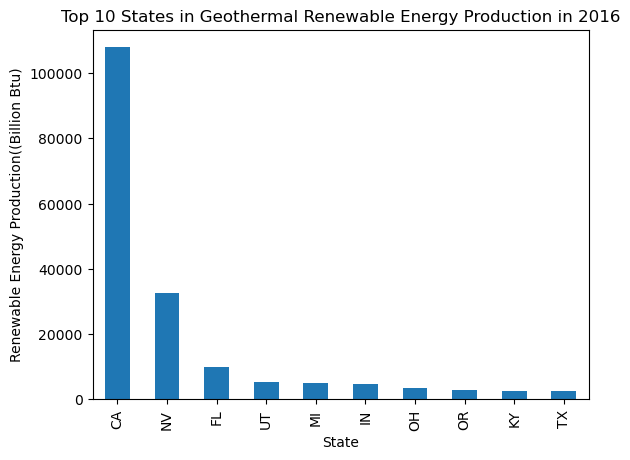

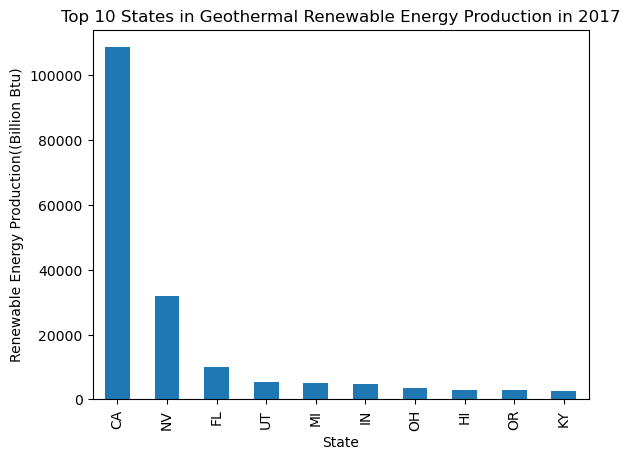

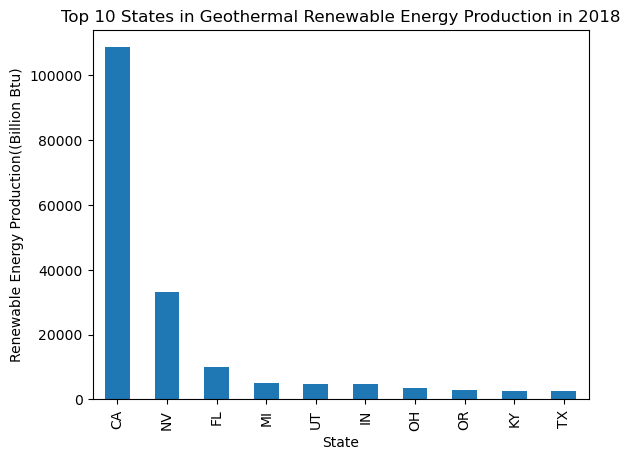

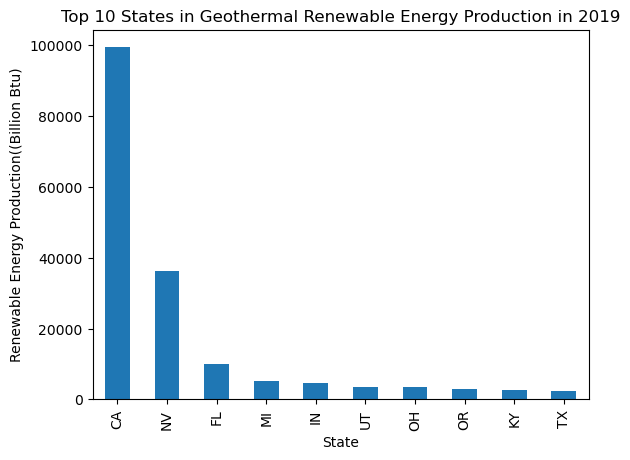

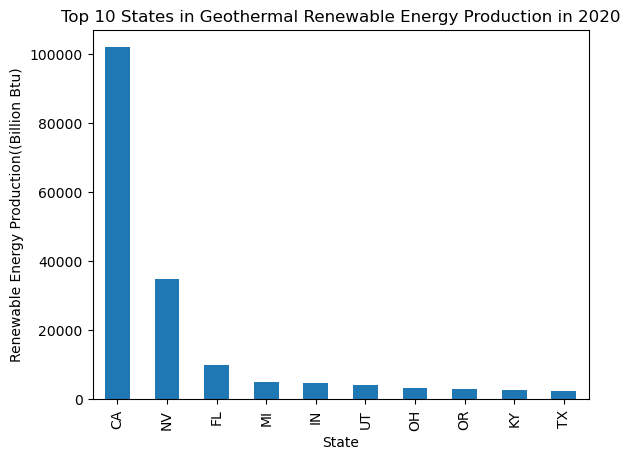

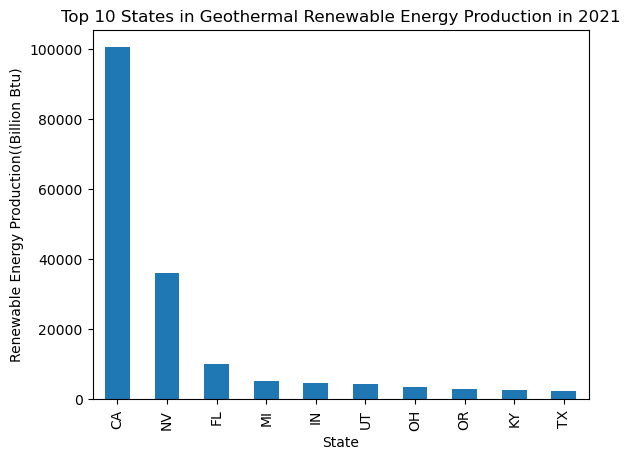

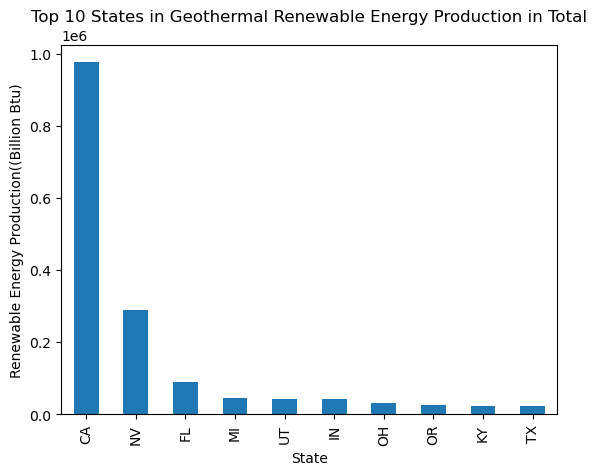

In [47]:
Topmost_State_RE_Production(df_Geothermal,'Geothermal')

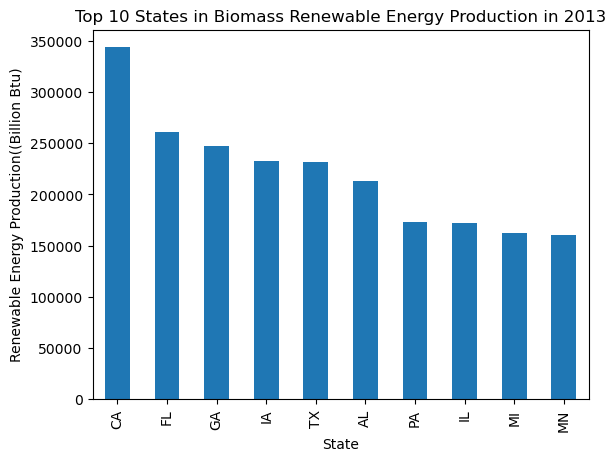

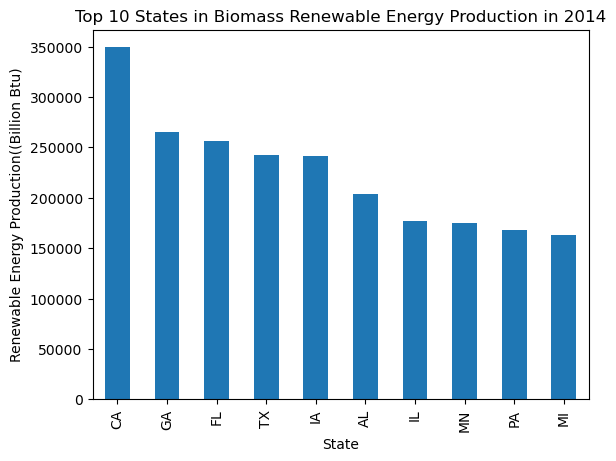

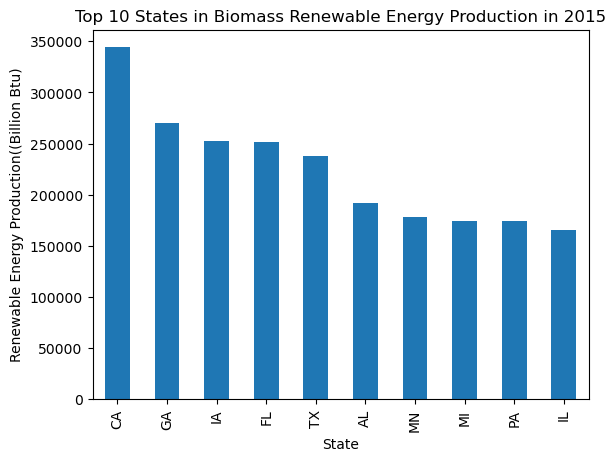

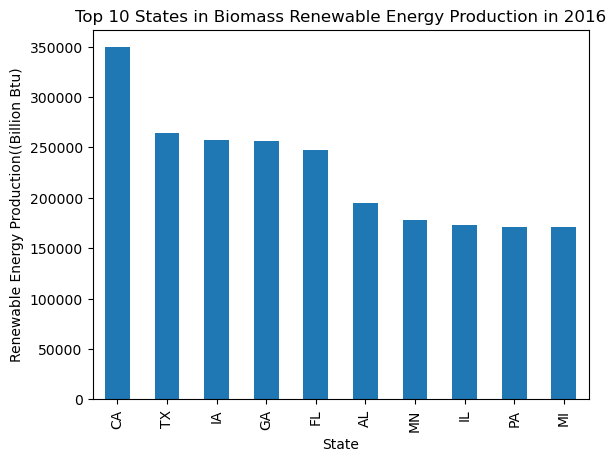

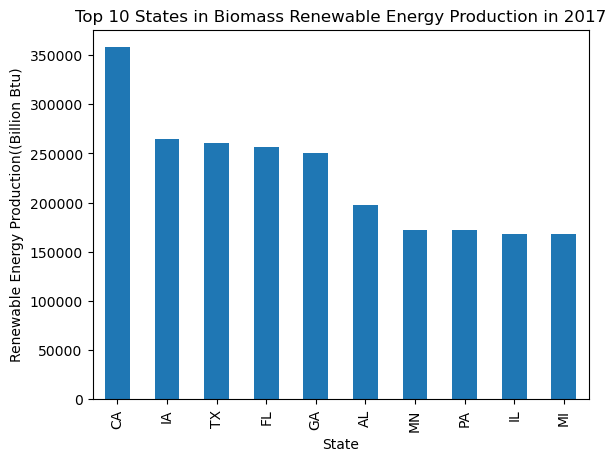

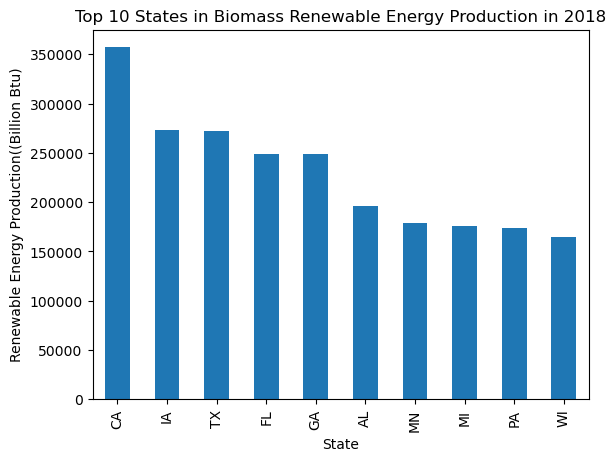

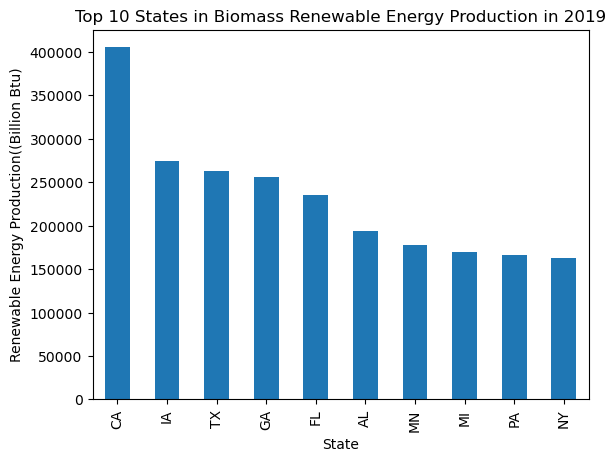

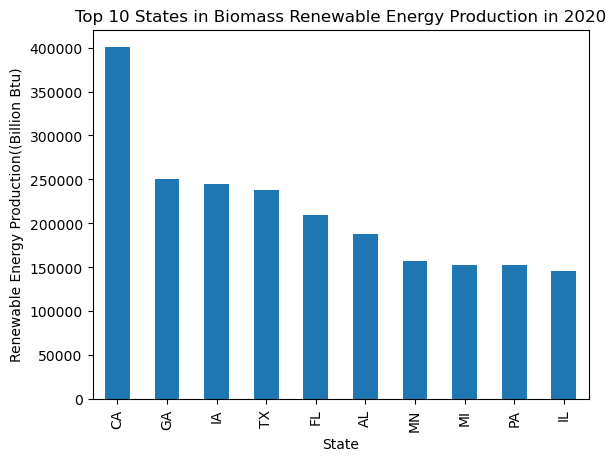

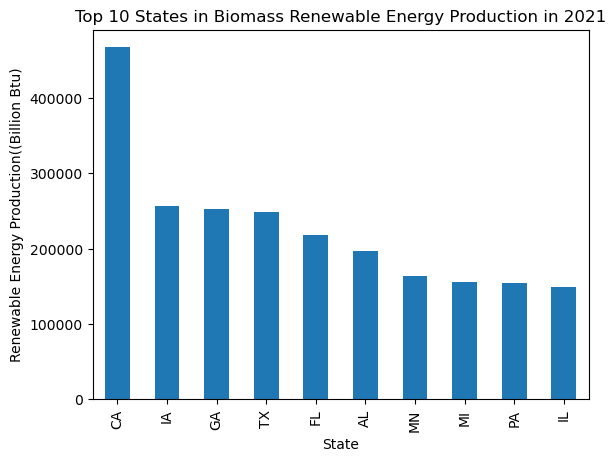

In [48]:
Topmost_State_RE_Production(df_Biomass,'Biomass')

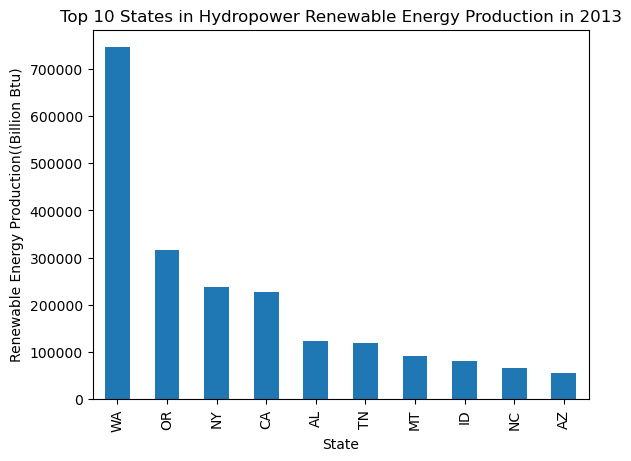

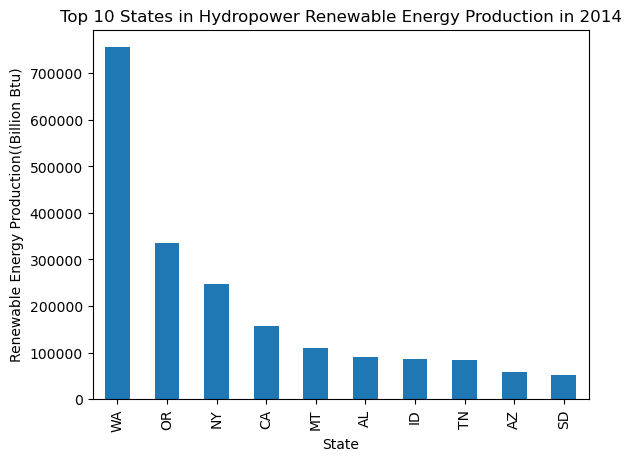

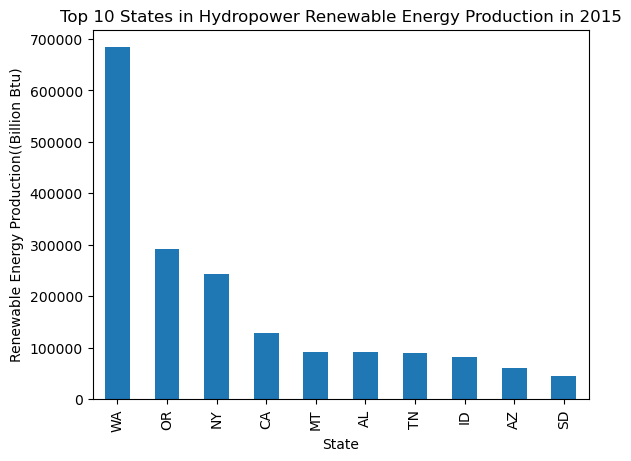

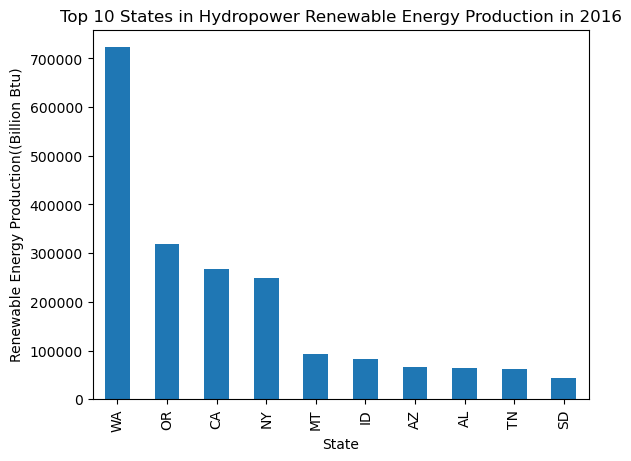

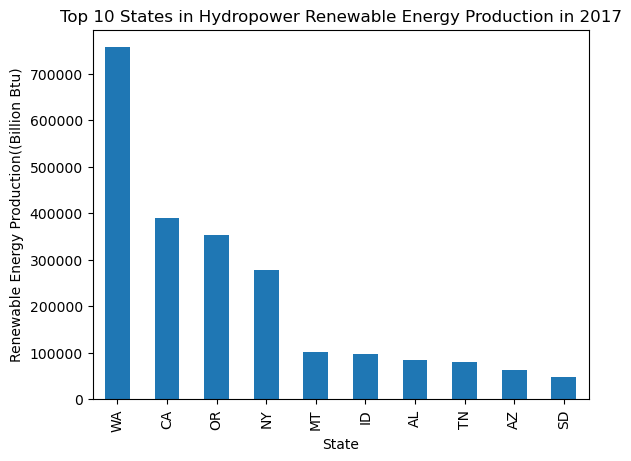

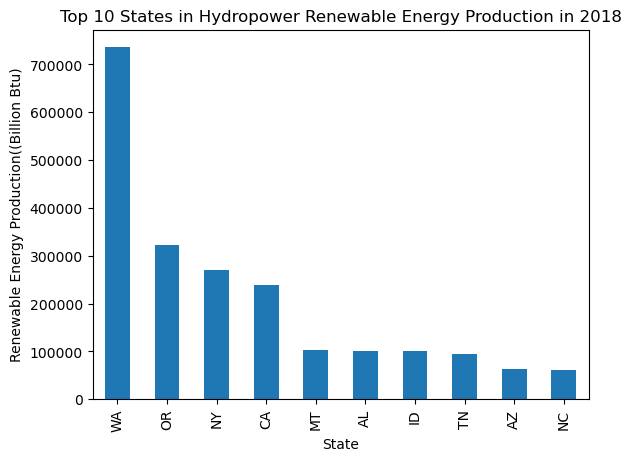

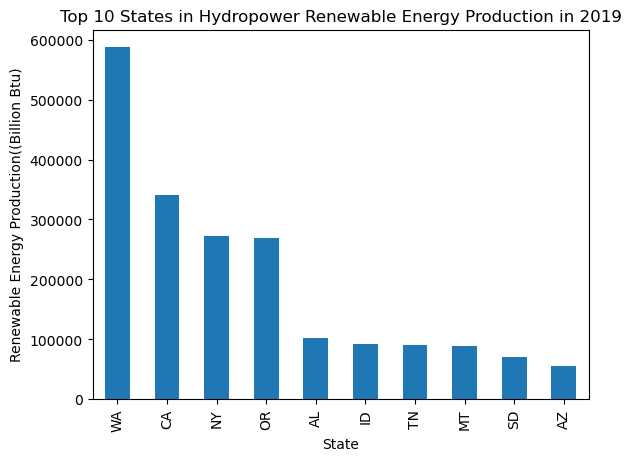

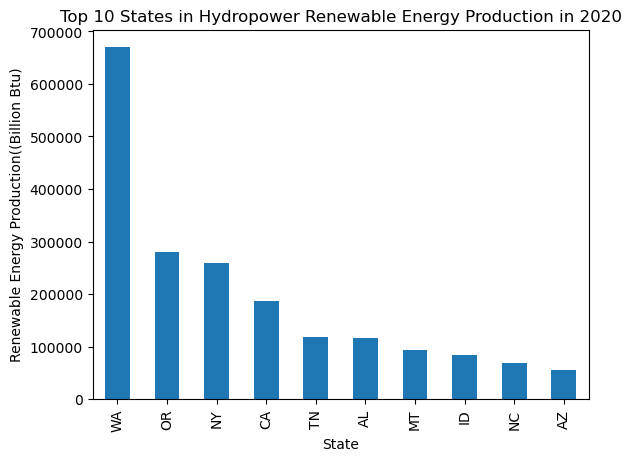

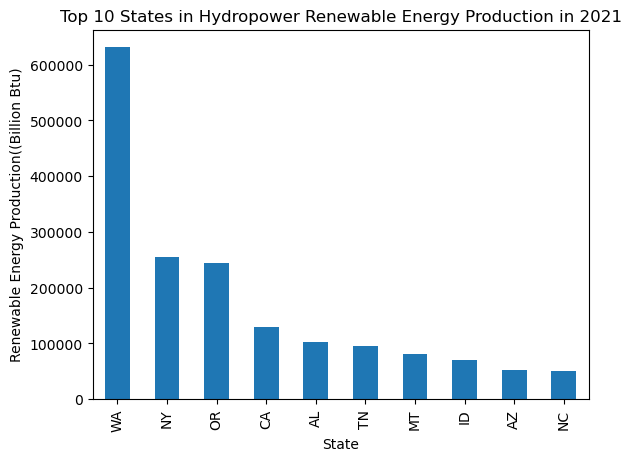

In [49]:
Topmost_State_RE_Production(df_Hydropower,'Hydropower')

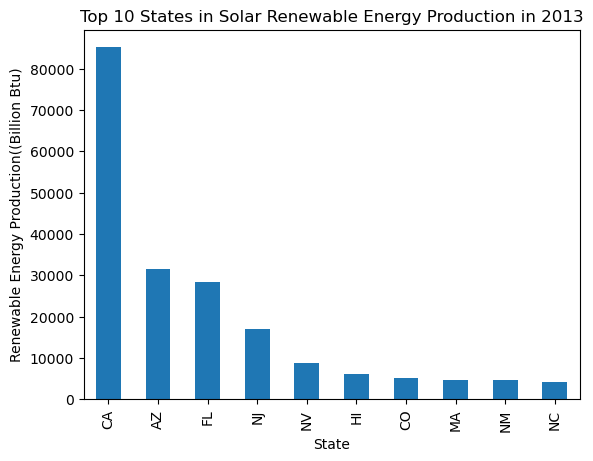

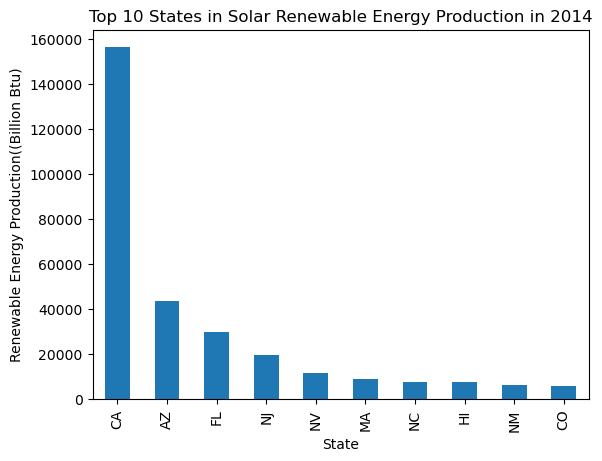

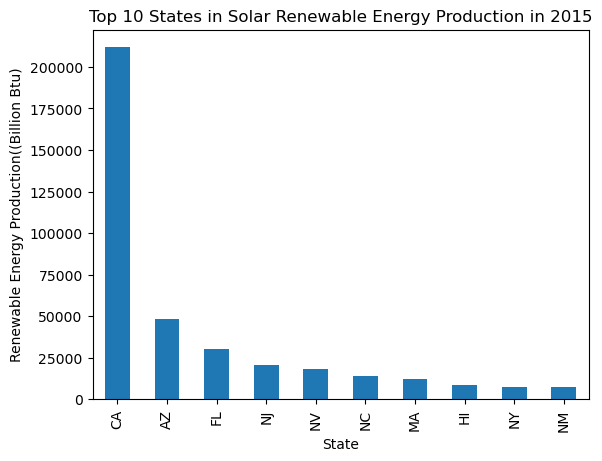

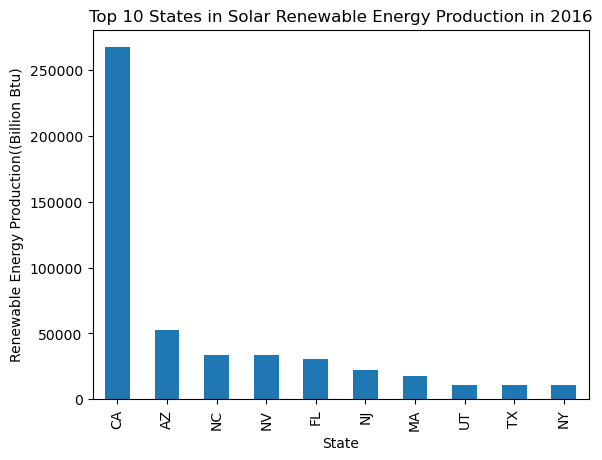

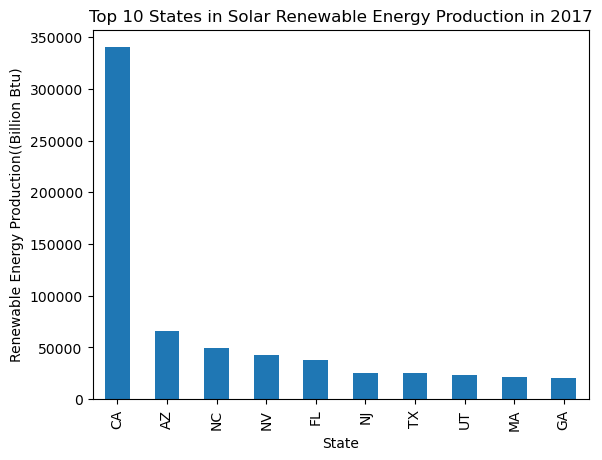

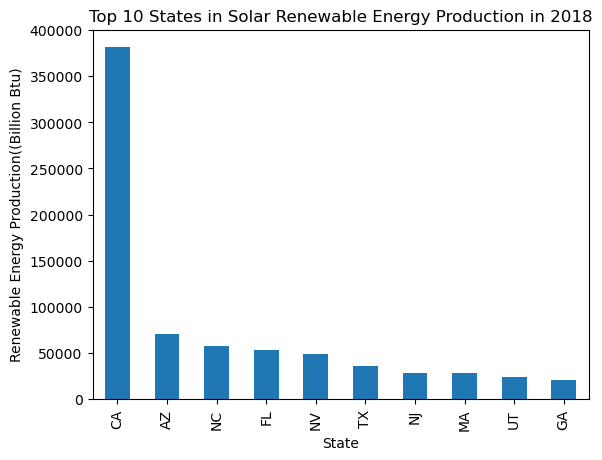

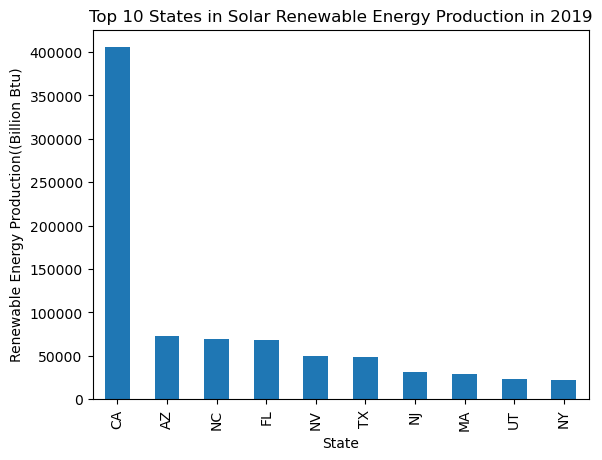

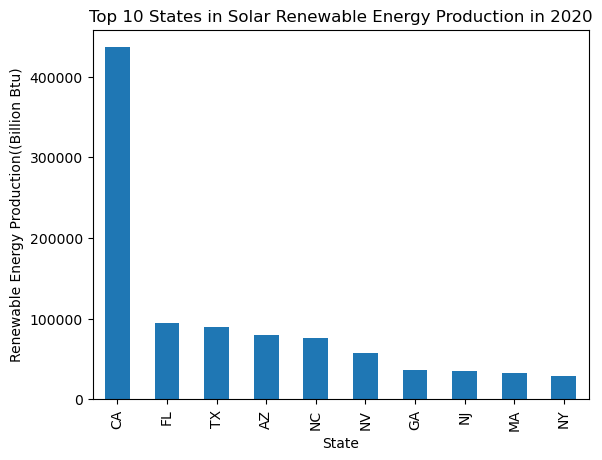

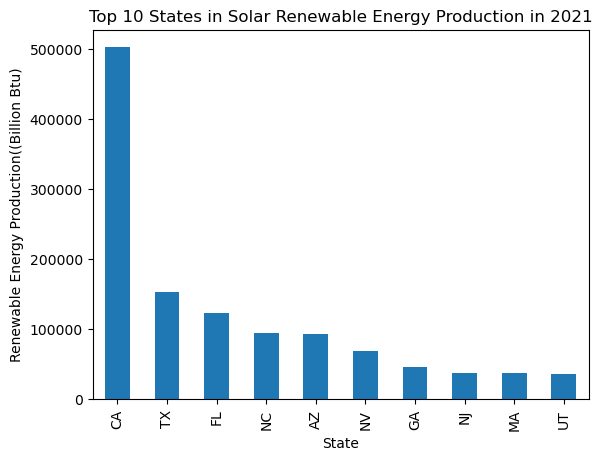

In [50]:
Topmost_State_RE_Production(df_Solar,'Solar')

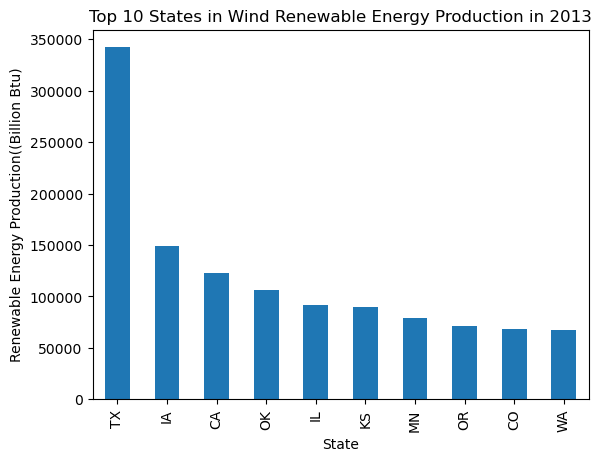

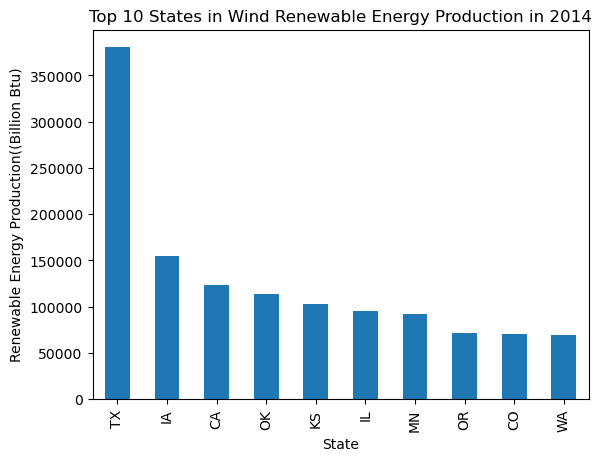

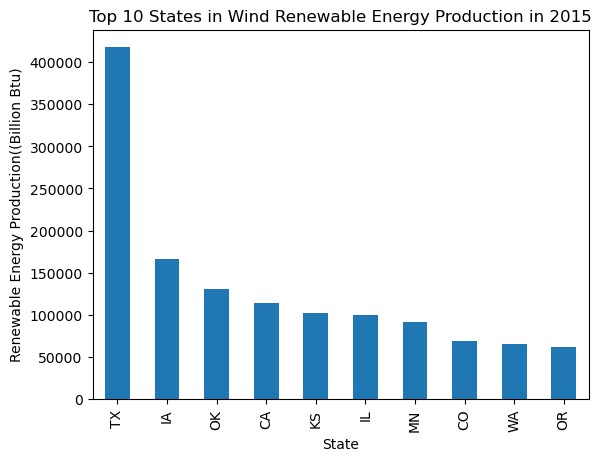

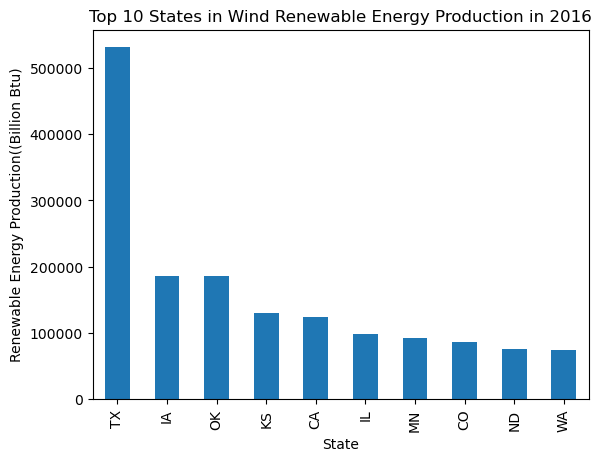

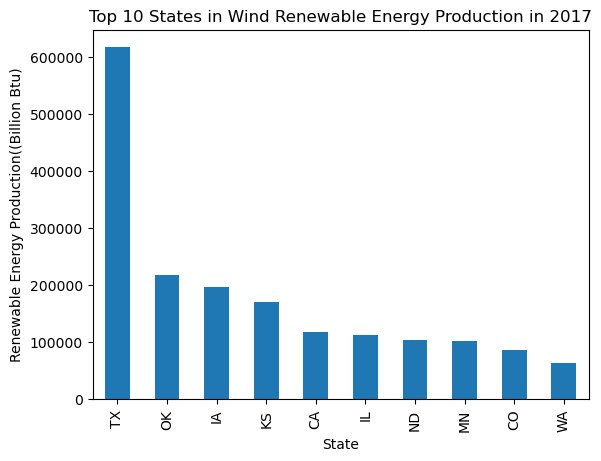

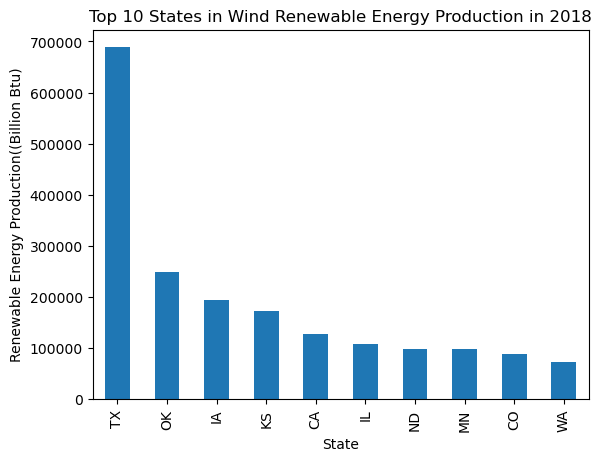

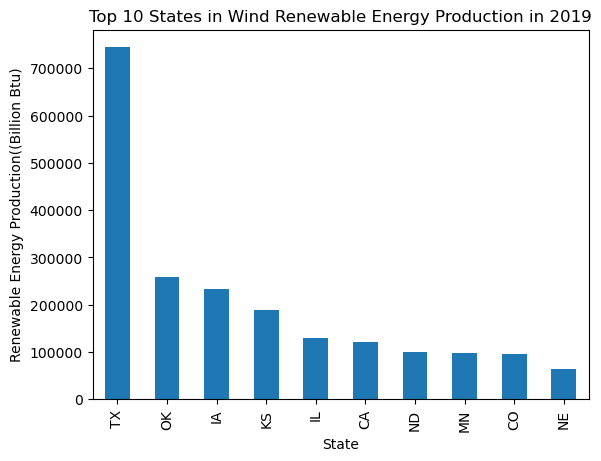

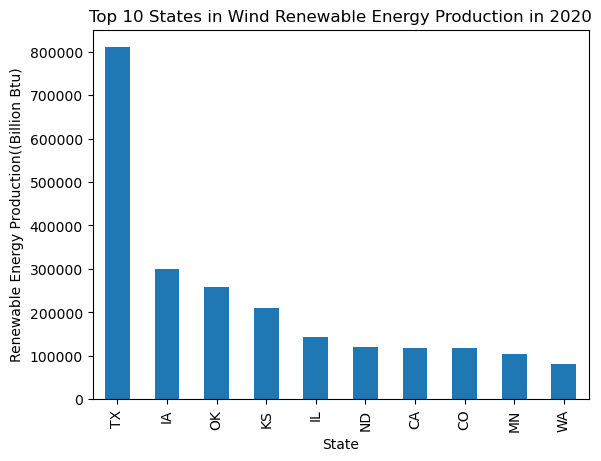

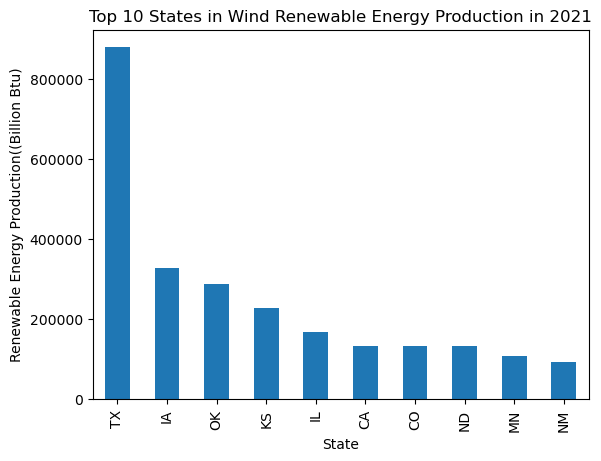

In [51]:
Topmost_State_RE_Production(df_Wind,'Wind')

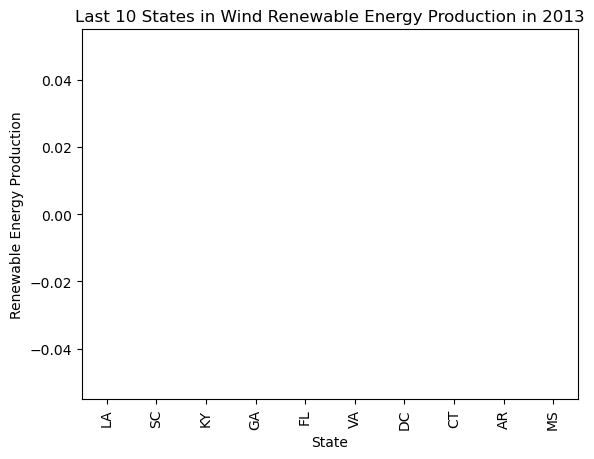

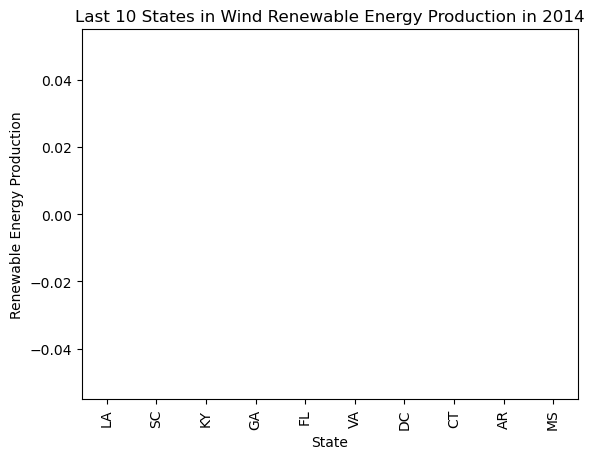

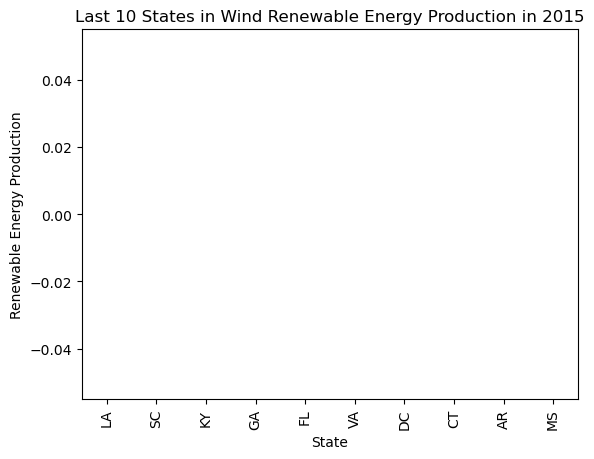

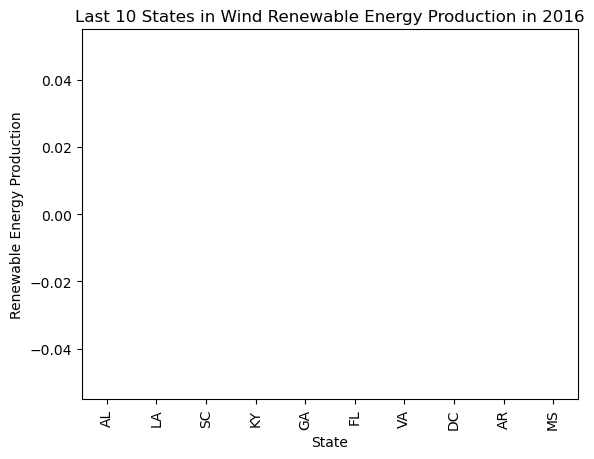

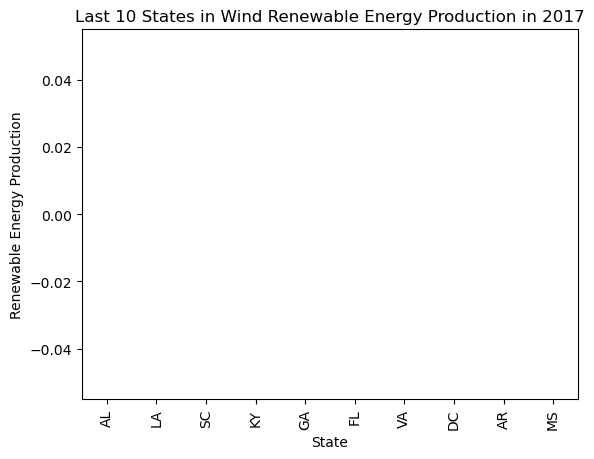

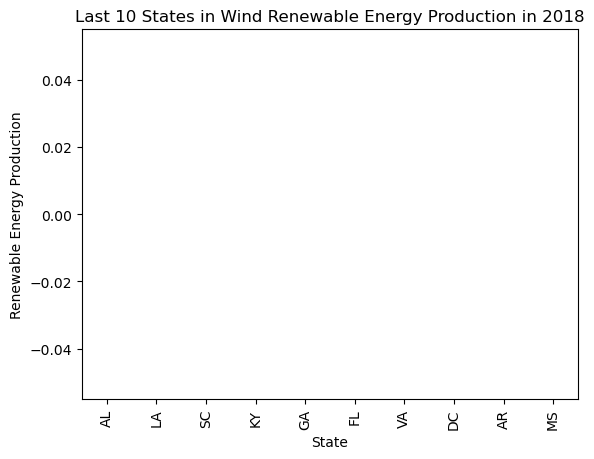

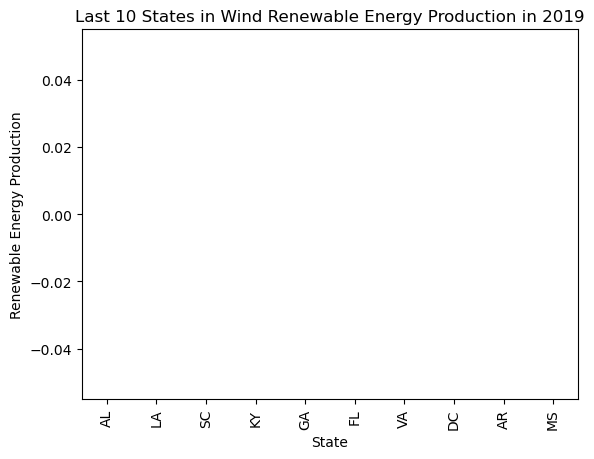

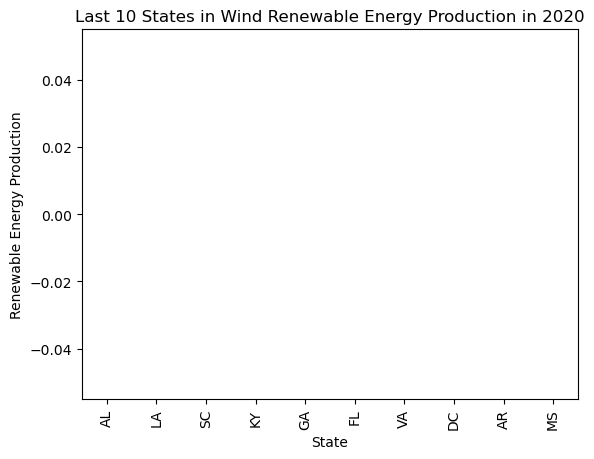

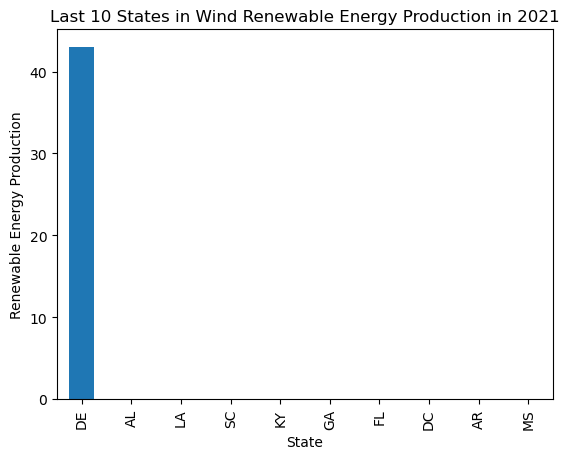

In [52]:
# Year wise checking for Wind.

for year in df_Wind.columns[1:]: # Skip the 'State' column
    # Sort the DataFrame by the current year column in descending order and keep the last 10 states.
    df_top_10 = df_Wind.sort_values(by=year, ascending=False).tail(10)
    
    # Creating a bar plot using the 'State' column as the x-axis and the current year column as the y-axis.
    df_top_10.plot(x='State', y=year, kind='bar', legend=False)
    
    # Adding labels and title.
    plt.xlabel('State')
    plt.ylabel('Renewable Energy Production')
    plt.title(f'Last 10 States in Wind Renewable Energy Production in {year}')
    
    # Displaying the plot.
    plt.show()

In [53]:
# now we checking for last 10 state in terms of production.

def LowestStates_RE_Production(df,Label):

    for year in df.columns[1:]: # Skip the 'State' column
        # Sort the DataFrame by the current year column in descending order and keep the last 10 states.
        df_top_10 = df.sort_values(by=year, ascending=False).tail(10)

        # Creating a bar plot using the 'State' column as the x-axis and the current year column as the y-axis.
        df_top_10.plot(x='State', y=year, kind='bar', legend=False)

        # Adding labels and title.
        plt.xlabel('State')
        plt.ylabel('Renewable Energy Production')
        plt.title(f'Last 10 States in {Label} Renewable Energy Production in {year}')

        # Displaying the plot.
        plt.show()

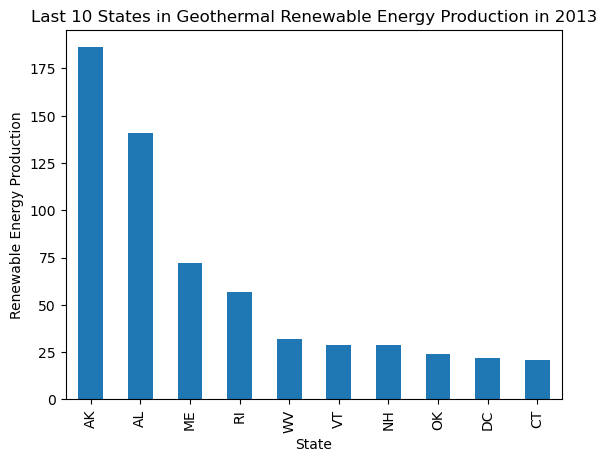

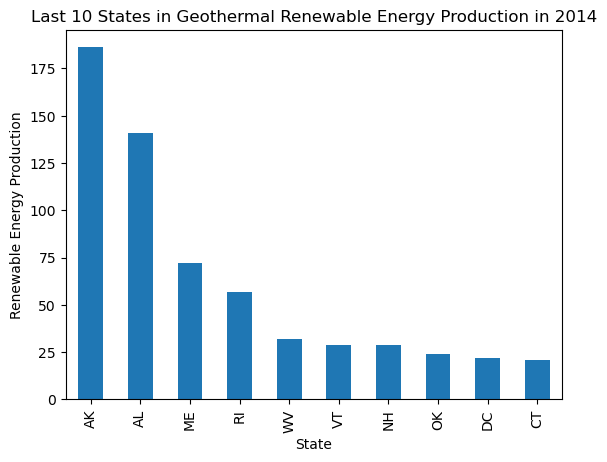

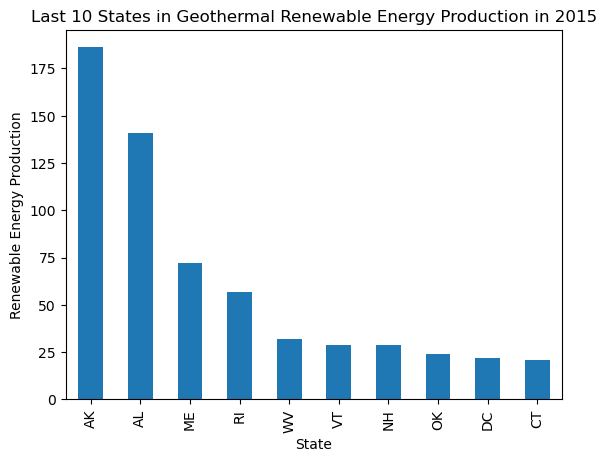

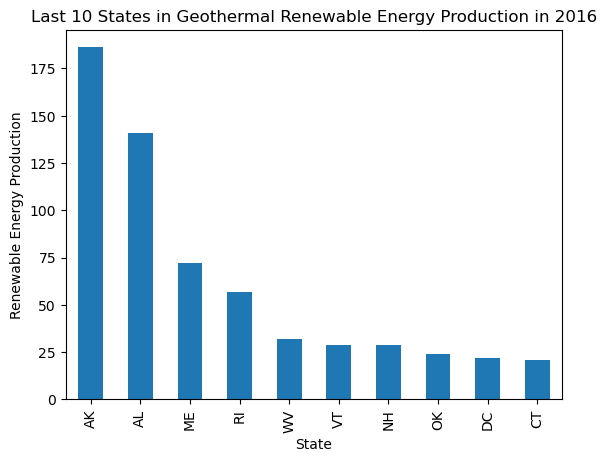

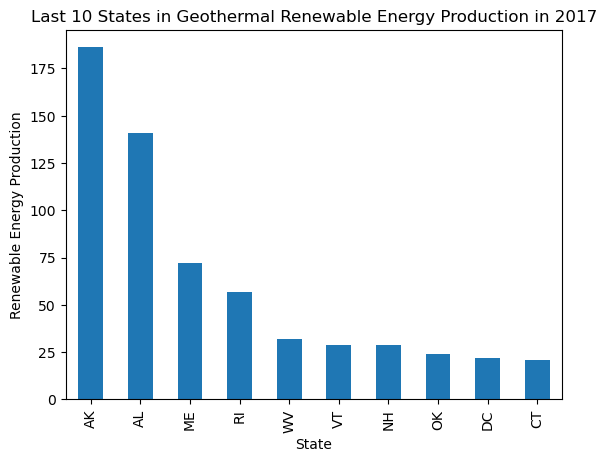

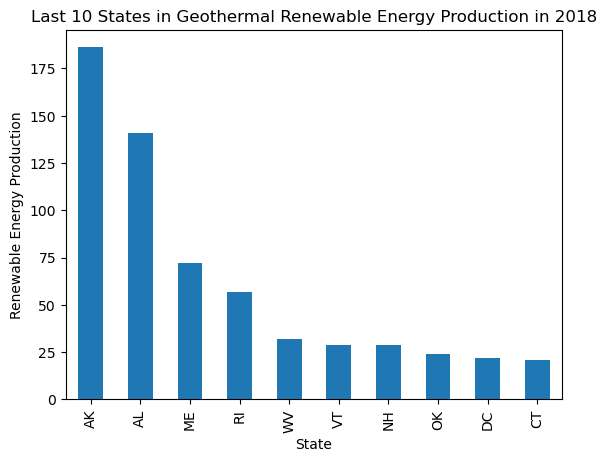

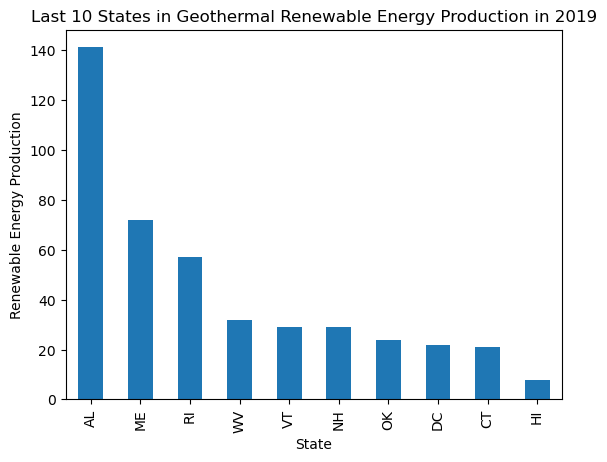

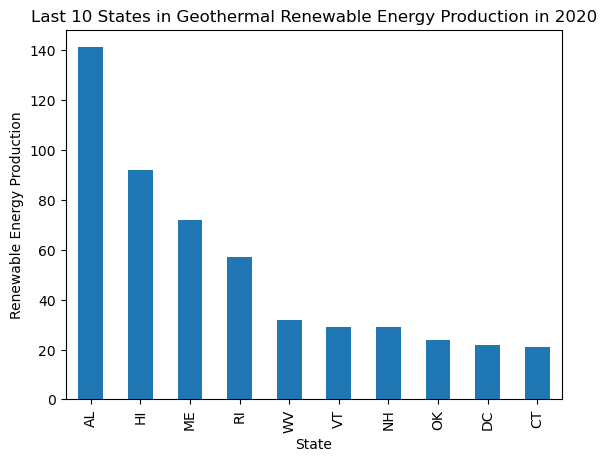

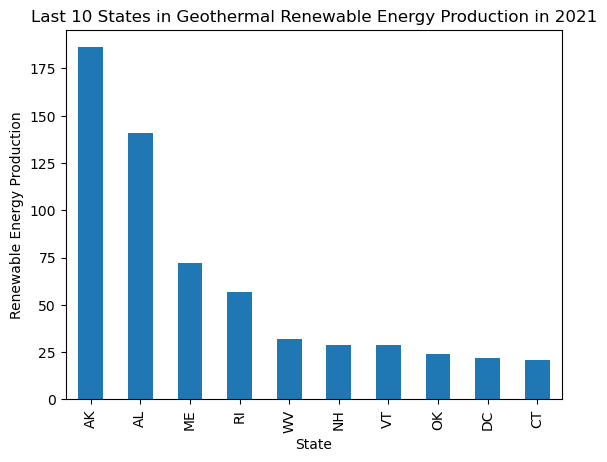

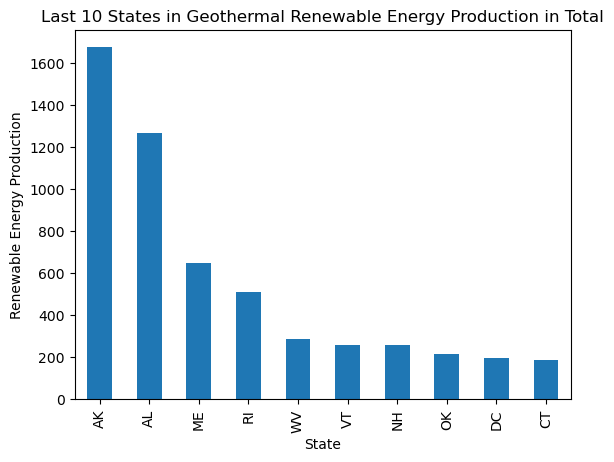

In [54]:
LowestStates_RE_Production(df_Geothermal,'Geothermal')

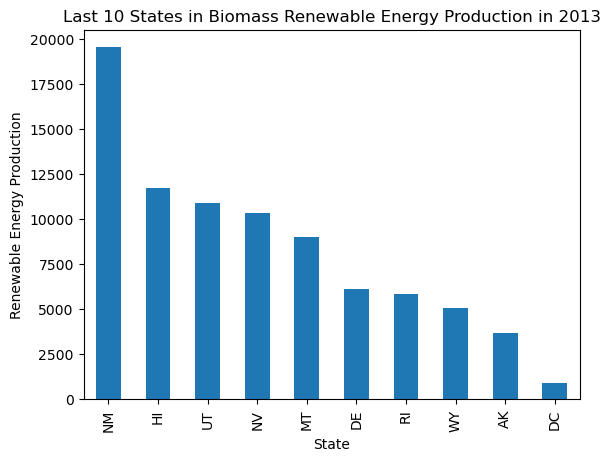

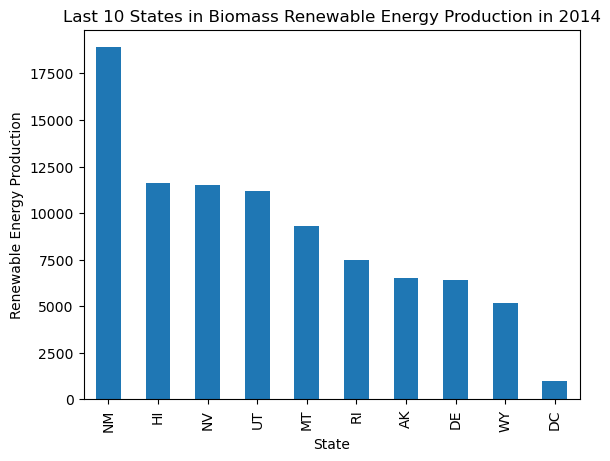

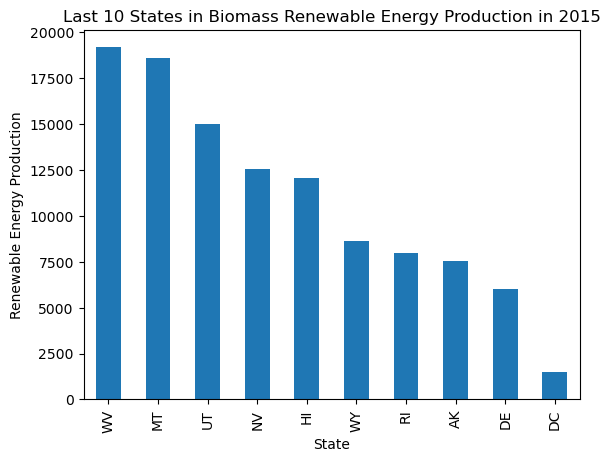

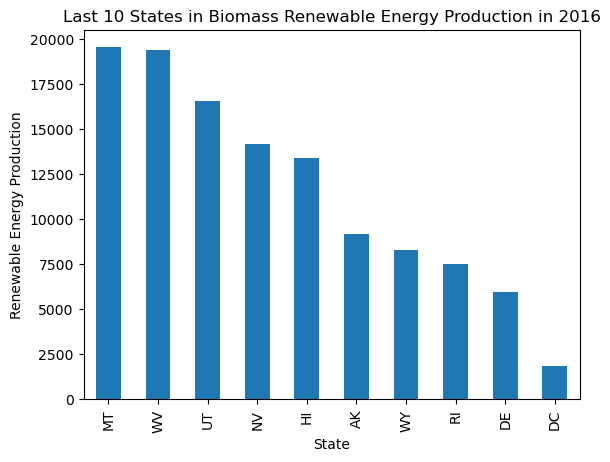

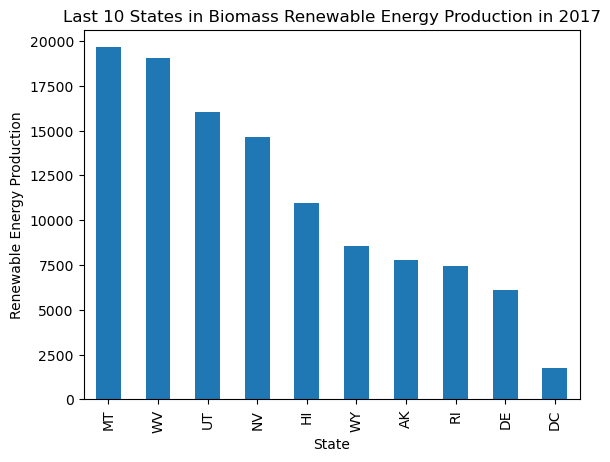

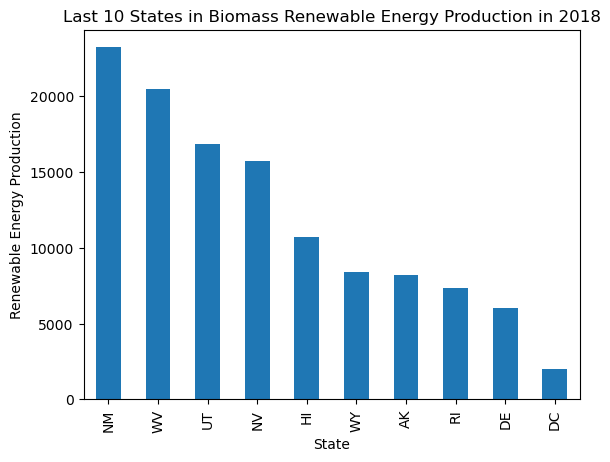

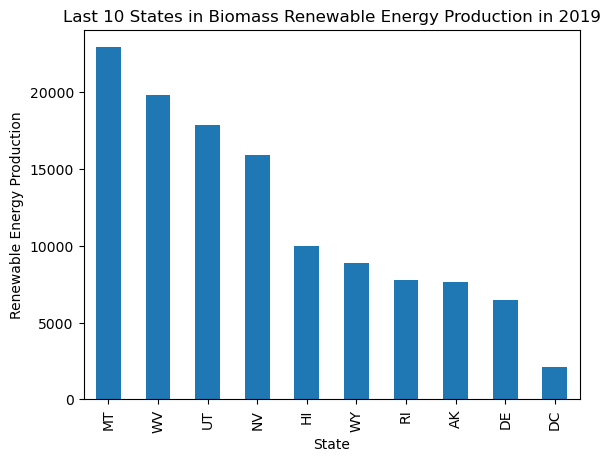

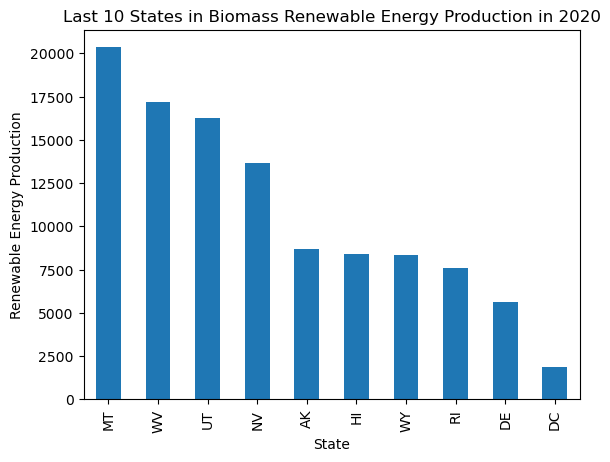

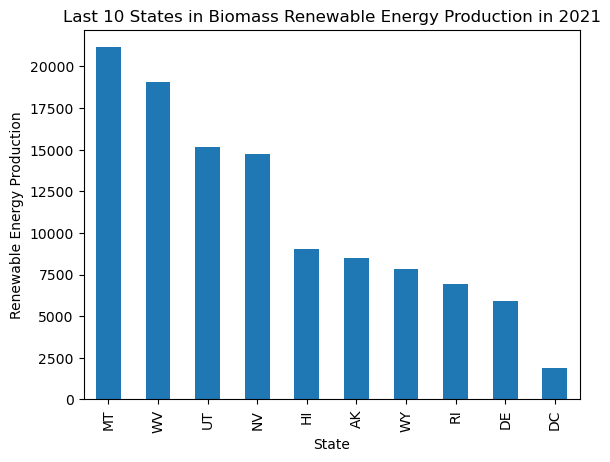

In [55]:
LowestStates_RE_Production(df_Biomass,'Biomass')

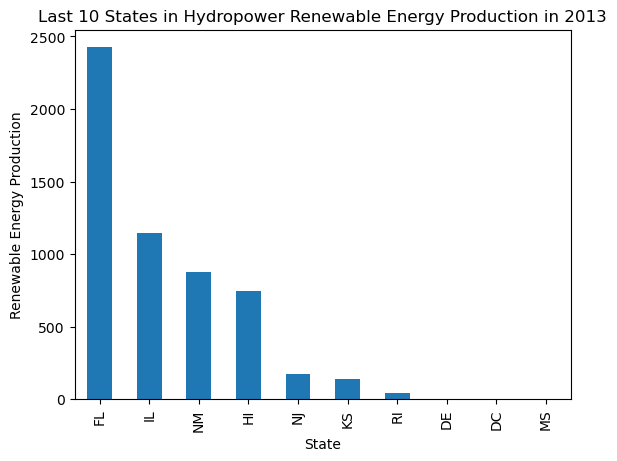

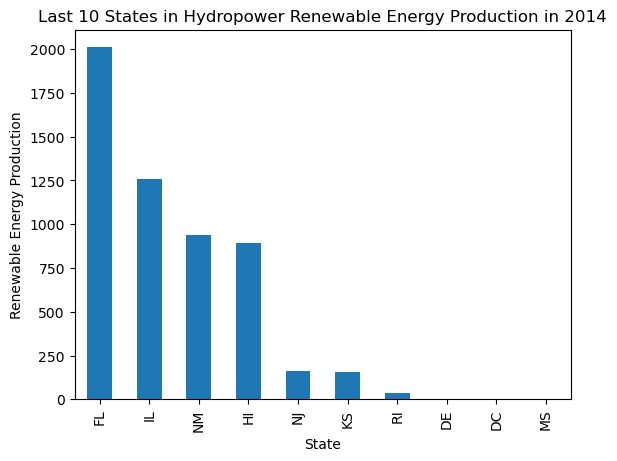

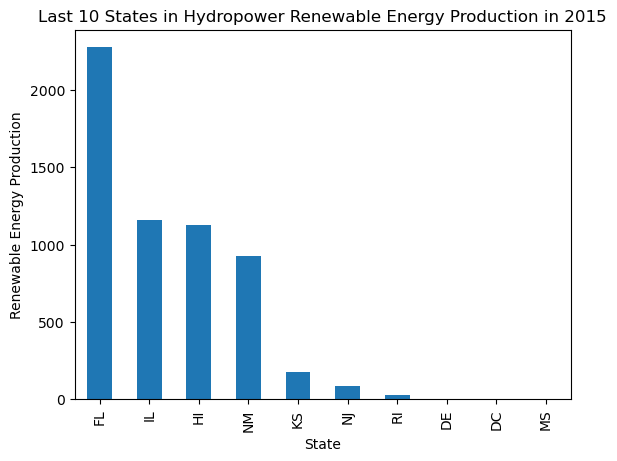

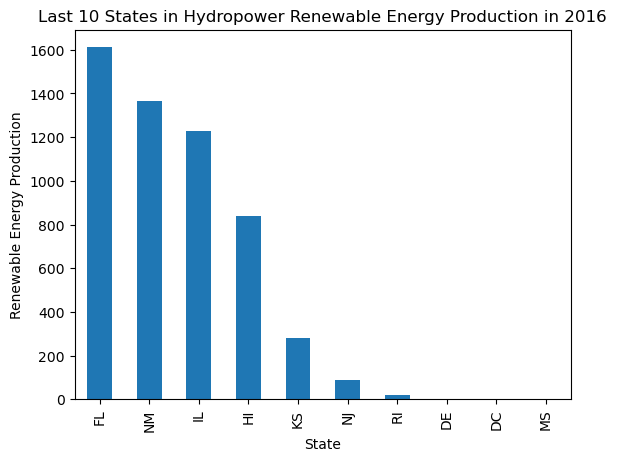

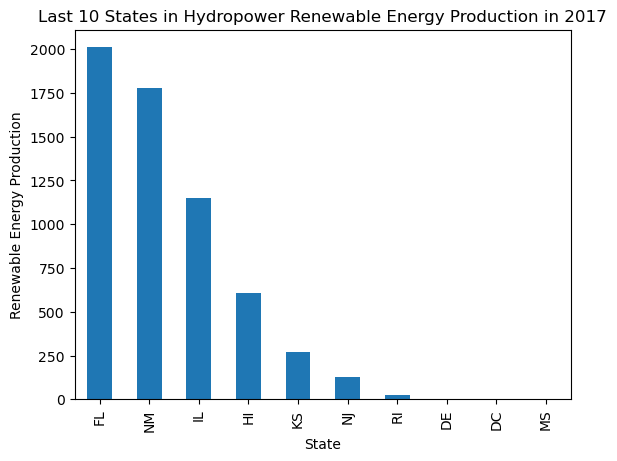

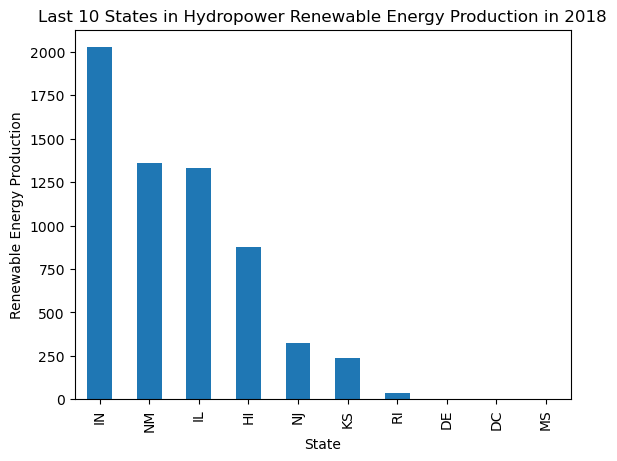

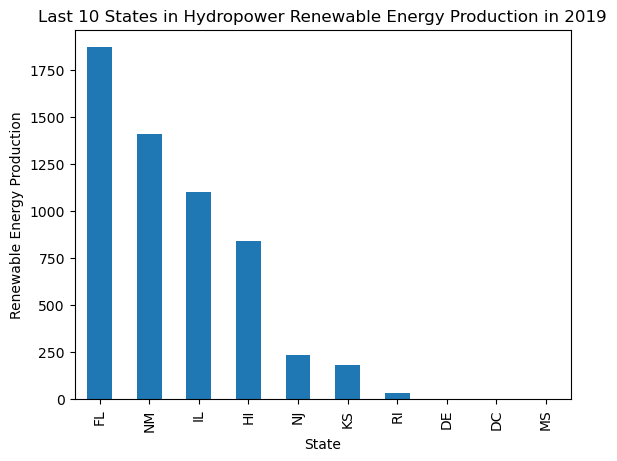

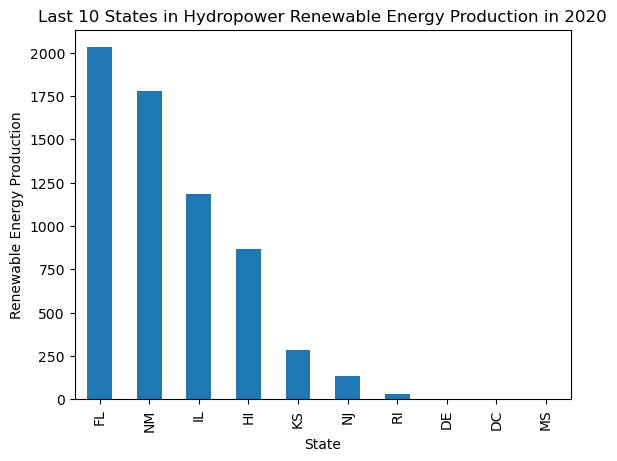

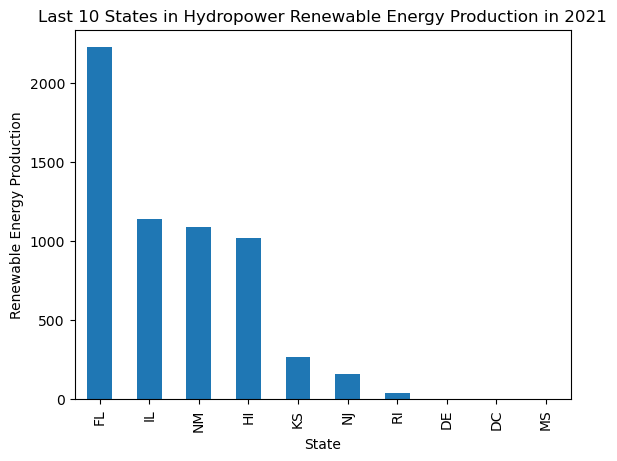

In [56]:
LowestStates_RE_Production(df_Hydropower,'Hydropower')

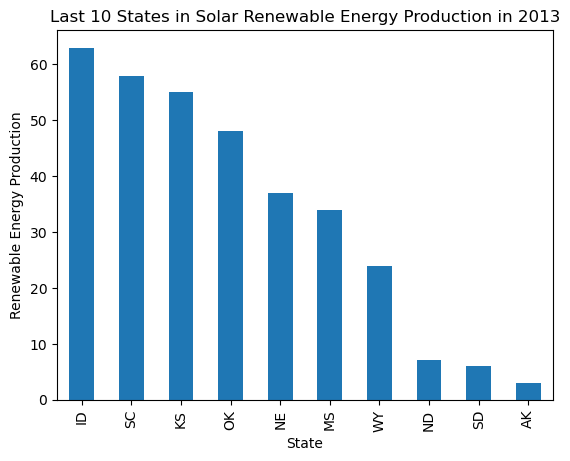

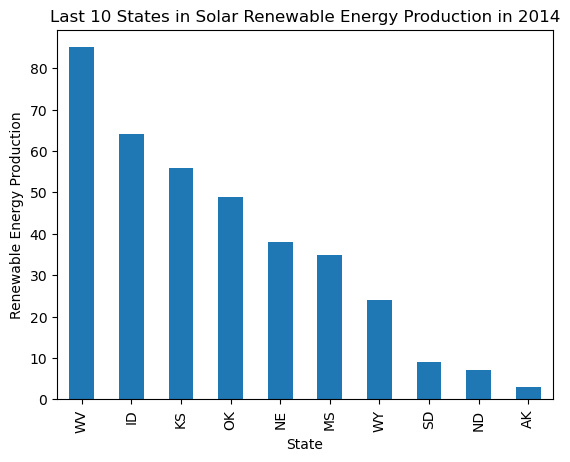

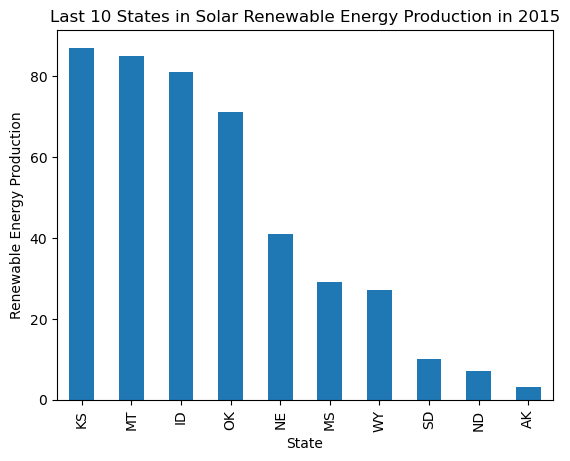

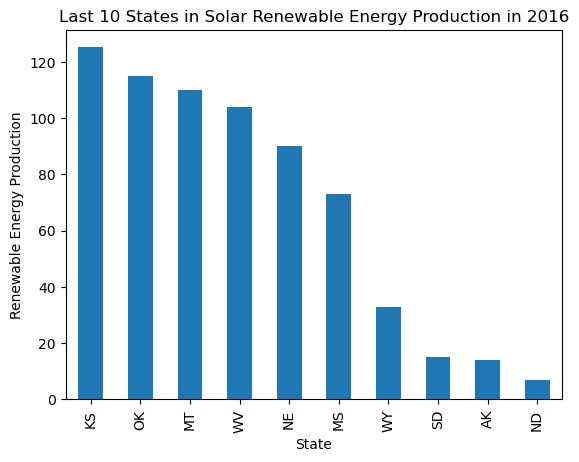

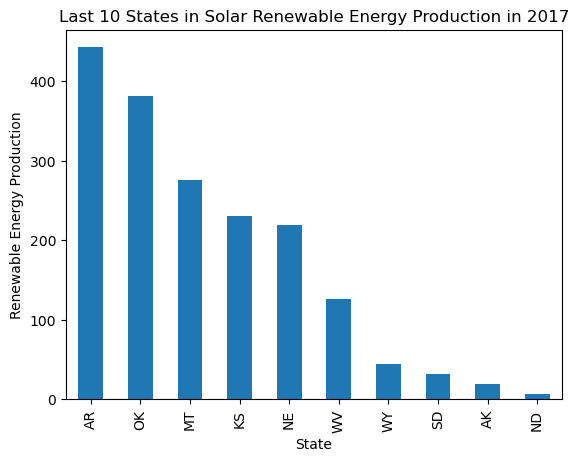

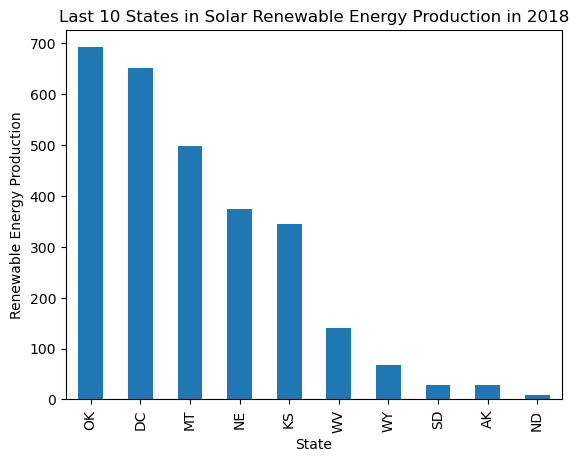

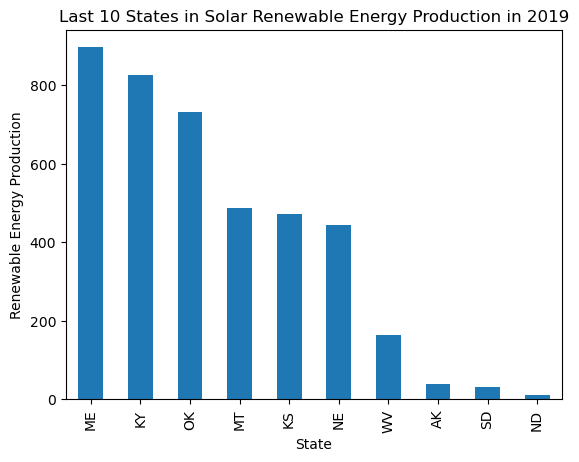

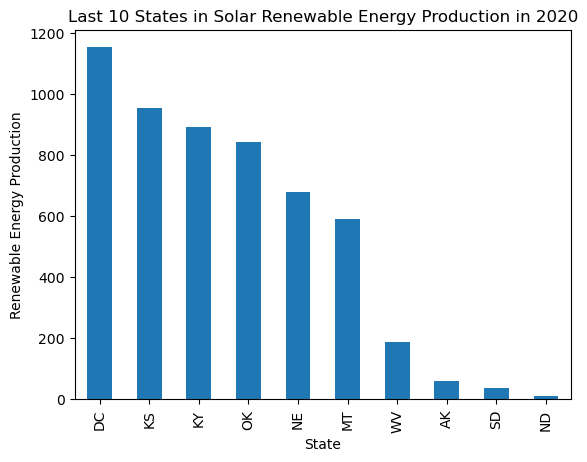

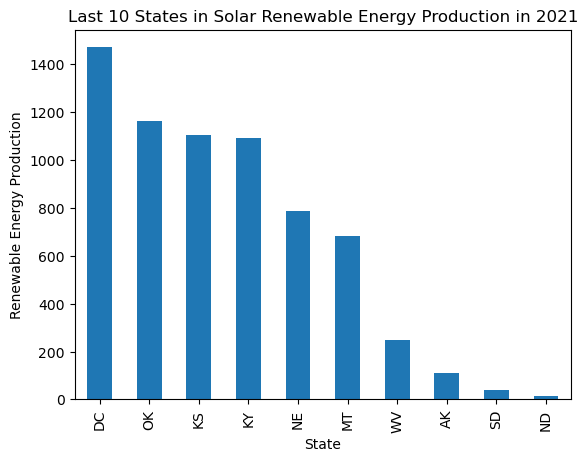

In [57]:
LowestStates_RE_Production(df_Solar,'Solar')

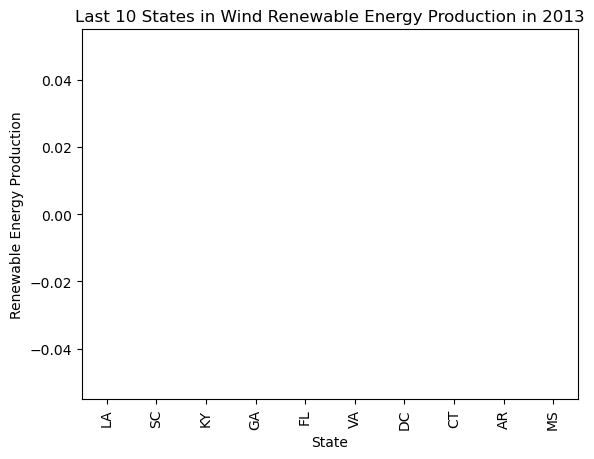

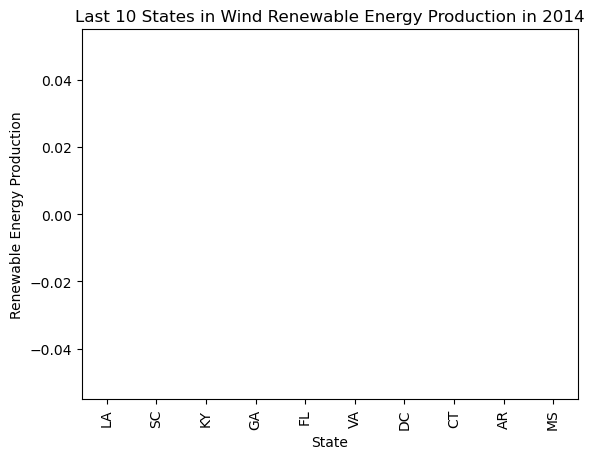

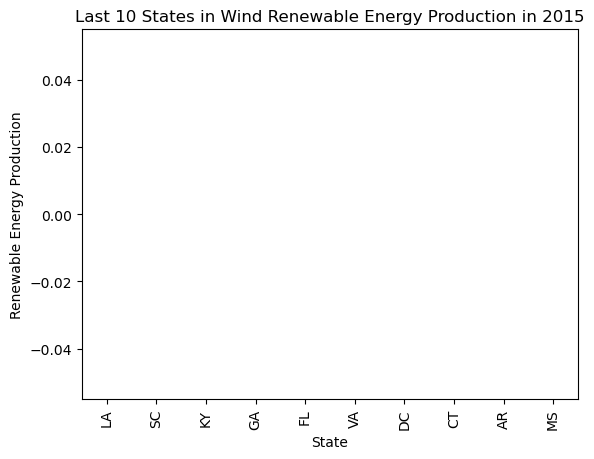

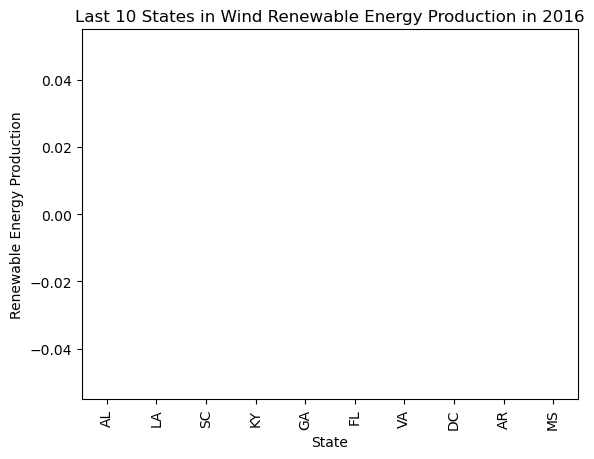

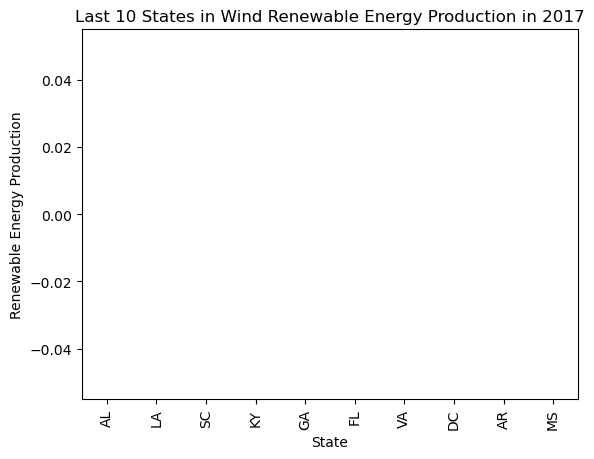

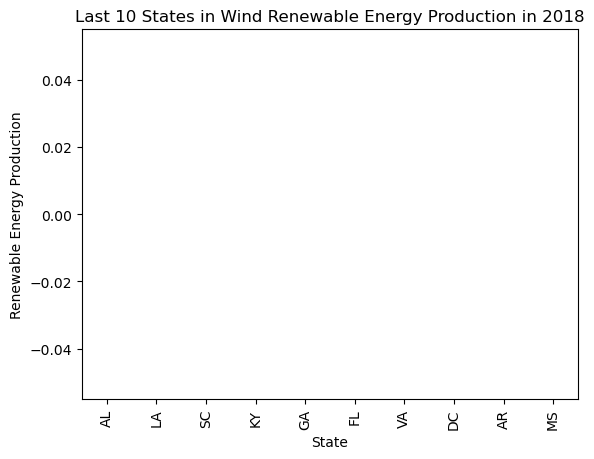

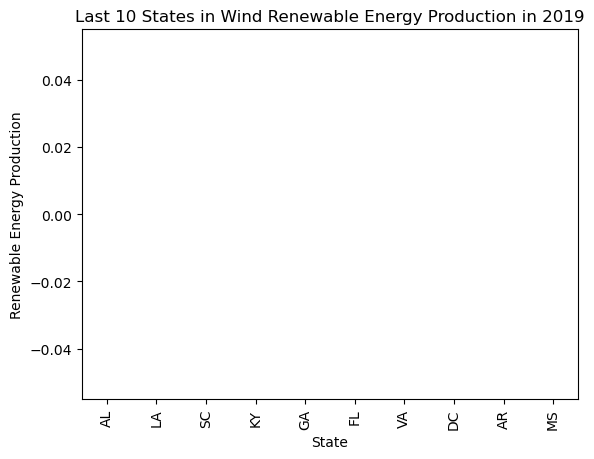

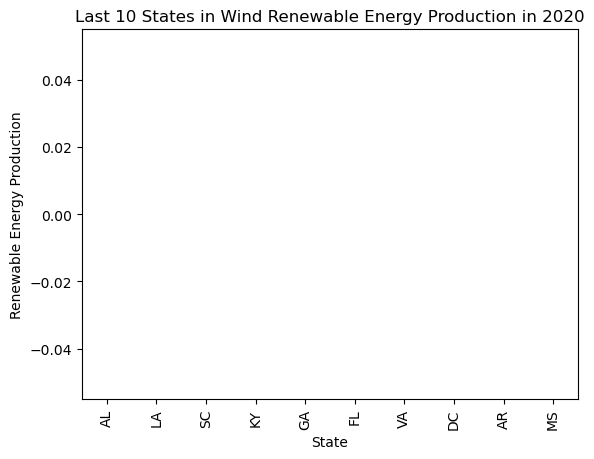

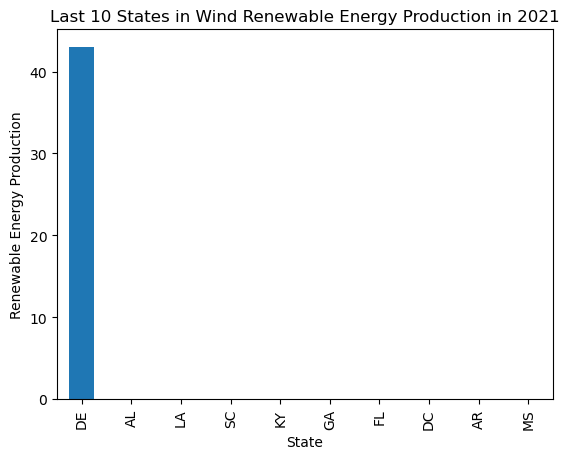

In [58]:
LowestStates_RE_Production(df_Wind,'Wind')